# Working With YUCO's Two Types of Files -- Mission/YUCO-centric (.csv) and Sidescan (.xtf)

## Using files from three YUCO-SCAN missions run on 2/22/2023 aboard the R/V Rutgers out of Great Bay, NJ

### Be sure to add pyxtf (<code>pip install pyxtf</code>) to your environment before running this notebook.

In [1]:
# First add imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cool_maps.plot as cplt
import cartopy
import cartopy.crs as ccrs
import cmocean.cm as cmo
import numpy as np

%matplotlib inline

# Now we add a few animation-specific imports...
from IPython import display
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
# plt.rcParams['animation.ffmpeg_path'] = r'c:/ffmpeg/bin/ffmpeg.exe'
plt.rcParams['animation.ffmpeg_path'] = '"C:/Users/csmit/miniconda3/envs/swbc2024/Lib/site-packages/ffmpeg"'

# Print out our current directory and the files. 
#!pwd
#!ls

### Load in the .csv files which contain information about the YUCO and its mission. 
Load files and combine all 3 into one dataframe to make it easier to handle. Then take a look.

In [2]:
missions= pd.read_csv('C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/dataset_20250417_143530_1_2025-04-15-Bay.csv', parse_dates=True, sep=',', index_col=0)
missions

Time since startup (s) AUV Status  Step Number  \
Timestamp (s) UTC+0                                                   
1.744901e+09                         16.661  UNDEFINED          NaN   
1.744901e+09                         16.701  UNDEFINED          NaN   
1.744901e+09                         16.750       INIT          0.0   
1.744901e+09                         16.811     WARMUP          0.0   
1.744901e+09                         16.852     WARMUP          0.0   
...                                     ...        ...          ...   
1.744911e+09                      10216.527   RECOVERY          1.0   
1.744911e+09                      10216.577   RECOVERY          1.0   
1.744911e+09                      10216.627   RECOVERY          1.0   
1.744911e+09                      10216.727   RECOVERY          1.0   
1.744911e+09                      10216.777   RECOVERY          1.0   

                    At surface (Y/N)  INX Latitude (deg)  INX Longitude (deg)  \
Timestamp (s) UTC+0                                                             
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       Y            0.000000             0.000000   
...                              ...                 ...                  ...   
1.744911e+09                       Y           40.475804           -74.231815   
1.744911e+09                       Y           40.475804           -74.231816   
1.744911e+09                       Y           40.475804           -74.231816   
1.744911e+09                       Y           40.475804           -74.231817   
1.744911e+09                       Y           40.475804           -74.231817   

                     Corrected Latitude (deg)  Corrected Longitude (deg)  \
Timestamp (s) UTC+0                                                        
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
...                                       ...                        ...   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   

                    GPS Coordinates Accepted (Y/N)  Raw GPS Latitude (deg)  \
Timestamp (s) UTC+0                                                          
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
...                                            ...                     ...   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   

                     ...  Pitch (deg)  

In [15]:
# Load in the files 
#mission_1 = pd.read_csv('./exports/003300173131511938383732_20230222_162629.csv', parse_dates=True, sep=',', index_col=0)
#mission_2 = pd.read_csv('./exports/003300173131511938383732_20230222_164209.csv', parse_dates=True, sep=',', index_col=0)
#mission_3 = pd.read_csv('./exports/003300173131511938383732_20230222_171032.csv', parse_dates=True, sep=',', index_col=0)
#missions  = pd.concat([mission_1, mission_2, mission_3]) #this line combines files
#missions


### Print column headers to investigate odd symbols.

In [3]:
missions.columns

Index(['Time since startup (s)', 'AUV Status', 'Step Number',
       'At surface (Y/N)', 'INX Latitude (deg)', 'INX Longitude (deg)',
       'Corrected Latitude (deg)', 'Corrected Longitude (deg)',
       'GPS Coordinates Accepted (Y/N)', 'Raw GPS Latitude (deg)',
       'Raw GPS Longitude (deg)', 'DVL Tracking Bottom (Y/N)',
       'X Velocity (m/s)', 'Y Velocity (m/s)', 'Z Velocity (m/s)',
       'Speed Command (m/s)', 'Depth (m)', 'Altitude (m)', 'Roll (deg)',
       'Pitch (deg)', 'Yaw (deg)', 'Internal Pressure (bar)',
       'Internal Temperature (deg C)', 'External Pressure (bar)',
       'External Temperature (deg C)', 'Atmospheric Pressure (bar)',
       'Battery Charge (percent)', 'Scan Recording (Y/N)',
       'Light Enabled (Y/N)'],
      dtype='object')

### The symbol � is showing up a few times. In Excel, it shows up as ÔøΩ. So what is it? Context clues gives us the likely answer.
How do we get rid of this unicode symbol issue? Convert it to ASCII!
Then we get rid of the empty () so they don't cause any problems later on.

In [4]:
for i in range(len(missions.columns)):
    missions = missions.rename(columns={missions.columns[i]: missions.columns[i].encode("ascii", "ignore").decode().replace(' ()','') })

missions

Time since startup (s) AUV Status  Step Number  \
Timestamp (s) UTC+0                                                   
1.744901e+09                         16.661  UNDEFINED          NaN   
1.744901e+09                         16.701  UNDEFINED          NaN   
1.744901e+09                         16.750       INIT          0.0   
1.744901e+09                         16.811     WARMUP          0.0   
1.744901e+09                         16.852     WARMUP          0.0   
...                                     ...        ...          ...   
1.744911e+09                      10216.527   RECOVERY          1.0   
1.744911e+09                      10216.577   RECOVERY          1.0   
1.744911e+09                      10216.627   RECOVERY          1.0   
1.744911e+09                      10216.727   RECOVERY          1.0   
1.744911e+09                      10216.777   RECOVERY          1.0   

                    At surface (Y/N)  INX Latitude (deg)  INX Longitude (deg)  \
Timestamp (s) UTC+0                                                             
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       N            0.000000             0.000000   
1.744901e+09                       Y            0.000000             0.000000   
...                              ...                 ...                  ...   
1.744911e+09                       Y           40.475804           -74.231815   
1.744911e+09                       Y           40.475804           -74.231816   
1.744911e+09                       Y           40.475804           -74.231816   
1.744911e+09                       Y           40.475804           -74.231817   
1.744911e+09                       Y           40.475804           -74.231817   

                     Corrected Latitude (deg)  Corrected Longitude (deg)  \
Timestamp (s) UTC+0                                                        
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
1.744901e+09                              NaN                        NaN   
...                                       ...                        ...   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   
1.744911e+09                              NaN                        NaN   

                    GPS Coordinates Accepted (Y/N)  Raw GPS Latitude (deg)  \
Timestamp (s) UTC+0                                                          
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
1.744901e+09                                     N                0.000000   
...                                            ...                     ...   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   
1.744911e+09                                     Y               40.475803   

                     ...  Pitch (deg)  

In [10]:
#for i in range(len(missions.columns)):
   # mission_1 = mission_1.rename(columns={mission_1.columns[i]: mission_1.columns[i].encode("ascii", "ignore").decode().replace(' ()','') })
    #mission_2 = mission_2.rename(columns={mission_2.columns[i]: mission_2.columns[i].encode("ascii", "ignore").decode().replace(' ()','') })
   # mission_3 = mission_3.rename(columns={mission_3.columns[i]: mission_3.columns[i].encode("ascii", "ignore").decode().replace(' ()','') })

#missions  = pd.concat([mission_1, mission_2, mission_3])
#missions

### Now what is going on with the times? Take a look at the first record.

In [5]:
missions.index[0]

1744900530.157

### What kind of time is that? That's [Unix time](https://en.wikipedia.org/wiki/Unix_time).
#### *"Unix time is a date and time representation widely used in computing. It measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the beginning of the Unix epoch, less adjustments made due to leap seconds. Unix time originated as the system time of Unix operating systems. It has come to be widely used in other computer operating systems, file systems, programming languages, and databases."*

In [6]:
missions.index  = pd.to_datetime(missions.index, unit='s')
#mission_1.index = pd.to_datetime(mission_1.index, unit='s')
#mission_2.index = pd.to_datetime(mission_2.index, unit='s')
#mission_3.index = pd.to_datetime(mission_3.index, unit='s')
missions

Time since startup (s) AUV Status  Step Number  \
Timestamp (s) UTC+0                                                             
2025-04-17 14:35:30.157000065                  16.661  UNDEFINED          NaN   
2025-04-17 14:35:30.197000027                  16.701  UNDEFINED          NaN   
2025-04-17 14:35:30.246000051                  16.750       INIT          0.0   
2025-04-17 14:35:30.306999922                  16.811     WARMUP          0.0   
2025-04-17 14:35:30.348000050                  16.852     WARMUP          0.0   
...                                               ...        ...          ...   
2025-04-17 17:25:30.023000002               10216.527   RECOVERY          1.0   
2025-04-17 17:25:30.072999954               10216.577   RECOVERY          1.0   
2025-04-17 17:25:30.122999907               10216.627   RECOVERY          1.0   
2025-04-17 17:25:30.223000050               10216.727   RECOVERY          1.0   
2025-04-17 17:25:30.273000002               10216.777   RECOVERY          1.0   

                              At surface (Y/N)  INX Latitude (deg)  \
Timestamp (s) UTC+0                                                  
2025-04-17 14:35:30.157000065                N            0.000000   
2025-04-17 14:35:30.197000027                N            0.000000   
2025-04-17 14:35:30.246000051                N            0.000000   
2025-04-17 14:35:30.306999922                N            0.000000   
2025-04-17 14:35:30.348000050                Y            0.000000   
...                                        ...                 ...   
2025-04-17 17:25:30.023000002                Y           40.475804   
2025-04-17 17:25:30.072999954                Y           40.475804   
2025-04-17 17:25:30.122999907                Y           40.475804   
2025-04-17 17:25:30.223000050                Y           40.475804   
2025-04-17 17:25:30.273000002                Y           40.475804   

                               INX Longitude (deg)  Corrected Latitude (deg)  \
Timestamp (s) UTC+0                                                            
2025-04-17 14:35:30.157000065             0.000000                       NaN   
2025-04-17 14:35:30.197000027             0.000000                       NaN   
2025-04-17 14:35:30.246000051             0.000000                       NaN   
2025-04-17 14:35:30.306999922             0.000000                       NaN   
2025-04-17 14:35:30.348000050             0.000000                       NaN   
...                                            ...                       ...   
2025-04-17 17:25:30.023000002           -74.231815                       NaN   
2025-04-17 17:25:30.072999954           -74.231816                       NaN   
2025-04-17 17:25:30.122999907           -74.231816                       NaN   
2025-04-17 17:25:30.223000050           -74.231817                       NaN   
2025-04-17 17:25:30.273000002           -74.231817                       NaN   

                               Corrected Longitude (deg)  \
Timestamp (s) UTC+0                                        
2025-04-17 14:35:30.157000065                        NaN   
2025-04-17 14:35:30.197000027                        NaN   
2025-04-17 14:35:30.246000051                        NaN   
2025-04-17 14:35:30.306999922                        NaN   
2025-04-17 14:35:30.348000050                        NaN   
...                                                  ...   
2025-04-17 17:25:30.023000002                        NaN   
2025-04-17 17:25:30.072999954                        NaN   
2025-04-17 17:25:30.122999907                        NaN   
2025-04-17 17:25:30.223000050                        NaN   
2025-04-17 17:25:30.273000002                        NaN   

                              GPS Coordinates Accepted (Y/N)  \
Timestamp (s) UTC+0                                            
2025-04-17 14:35:30.157000065                              N   
2025-04-17 14:35:30.197000027                       

### That looks like much better time records! But it looks like there are still many recordings per second, resulting in ~87000 records. That's a lot of extra information, when this is mostly just positional data. Can we consolidate that down to just second intervals?

In [7]:
# missions.resample('1S').mean()

missions_numeric = missions.select_dtypes(include=['number'])
missions_numeric.resample('1S').mean()

Time since startup (s)  Step Number  INX Latitude (deg)  \
Timestamp (s) UTC+0                                                            
2025-04-17 14:35:30               17.058529          0.0            0.000000   
2025-04-17 14:35:31               17.971632          0.0            0.000000   
2025-04-17 14:35:32               18.983300          0.0            0.000000   
2025-04-17 14:35:33               19.991700          0.0            0.000000   
2025-04-17 14:35:34               20.995150          0.0            0.000000   
...                                     ...          ...                 ...   
2025-04-17 17:25:26            10213.002000          1.0           40.475793   
2025-04-17 17:25:27            10214.002000          1.0           40.475797   
2025-04-17 17:25:28            10215.002050          1.0           40.475801   
2025-04-17 17:25:29            10216.002050          1.0           40.475804   
2025-04-17 17:25:30            10216.647000          1.0           40.475804   

                     INX Longitude (deg)  Corrected Latitude (deg)  \
Timestamp (s) UTC+0                                                  
2025-04-17 14:35:30             0.000000                       NaN   
2025-04-17 14:35:31             0.000000                       NaN   
2025-04-17 14:35:32             0.000000                       NaN   
2025-04-17 14:35:33             0.000000                       NaN   
2025-04-17 14:35:34             0.000000                       NaN   
...                                  ...                       ...   
2025-04-17 17:25:26           -74.231732                       NaN   
2025-04-17 17:25:27           -74.231755                 40.475799   
2025-04-17 17:25:28           -74.231777                       NaN   
2025-04-17 17:25:29           -74.231801                       NaN   
2025-04-17 17:25:30           -74.231816                       NaN   

                     Corrected Longitude (deg)  Raw GPS Latitude (deg)  \
Timestamp (s) UTC+0                                                      
2025-04-17 14:35:30                        NaN                0.000000   
2025-04-17 14:35:31                        NaN                0.000000   
2025-04-17 14:35:32                        NaN                0.000000   
2025-04-17 14:35:33                        NaN                0.000000   
2025-04-17 14:35:34                        NaN                0.000000   
...                                        ...                     ...   
2025-04-17 17:25:26                        NaN               40.475794   
2025-04-17 17:25:27                 -74.231764               40.475797   
2025-04-17 17:25:28                        NaN               40.475801   
2025-04-17 17:25:29                        NaN               40.475803   
2025-04-17 17:25:30                        NaN               40.475803   

                     Raw GPS Longitude (deg)  X Velocity (m/s)  \
Timestamp (s) UTC+0                                              
2025-04-17 14:35:30                 0.000000          0.000000   
2025-04-17 14:35:31                 0.000000          0.000000   
2025-04-17 14:35:32                 0.000000          0.000000   
2025-04-17 14:35:33                 0.000000          0.000000   
2025-04-17 14:35:34                 0.000000          0.000000   
...                                      ...               ...   
2025-04-17 17:25:26               -74.231738         -0.367696   
2025-04-17 17:25:27               -74.231761         -0.367691   
2025-04-17 17:25:28               -74.231784         -0.367696   
2025-04-17 17:25:29               -74.231807         -0.367712   
2025-04-17 17:25:30               -74.231819         -0.367648   

                     Y Velocity (m/s)  ...  Altitude (m)  Roll (deg)  \
Timestamp (s) UTC+0                    ...                             
2025-04-17 14:35:30          0.000000  ...           NaN   -1.386080   
2025-04-17 14:35:31          0.

### That looks better, but we've gone from 25 columns to 19 columns? Taking the mean of the resample has stripped out all of the columns with just strings. How can we preserve those?

In [8]:
missions.resample('1S').agg({'AUV Status':'first', 'At surface (Y/N)':'first', 'GPS Coordinates Accepted (Y/N)':'first', 'DVL Tracking Bottom (Y/N)':'first', 'Scan Recording (Y/N)':'first', 'Light Enabled (Y/N)':'first'})

AUV Status At surface (Y/N)  \
Timestamp (s) UTC+0                               
2025-04-17 14:35:30  UNDEFINED                N   
2025-04-17 14:35:31       HOLD                Y   
2025-04-17 14:35:32       HOLD                Y   
2025-04-17 14:35:33       HOLD                Y   
2025-04-17 14:35:34       HOLD                Y   
...                        ...              ...   
2025-04-17 17:25:26   RECOVERY                Y   
2025-04-17 17:25:27   RECOVERY                Y   
2025-04-17 17:25:28   RECOVERY                Y   
2025-04-17 17:25:29   RECOVERY                Y   
2025-04-17 17:25:30   RECOVERY                Y   

                    GPS Coordinates Accepted (Y/N) DVL Tracking Bottom (Y/N)  \
Timestamp (s) UTC+0                                                            
2025-04-17 14:35:30                              N                         N   
2025-04-17 14:35:31                              N                         N   
2025-04-17 14:35:32                              N                         N   
2025-04-17 14:35:33                              N                         N   
2025-04-17 14:35:34                              N                         N   
...                                            ...                       ...   
2025-04-17 17:25:26                              Y                         N   
2025-04-17 17:25:27                              Y                         N   
2025-04-17 17:25:28                              Y                         N   
2025-04-17 17:25:29                              Y                         N   
2025-04-17 17:25:30                              Y                         N   

                    Scan Recording (Y/N) Light Enabled (Y/N)  
Timestamp (s) UTC+0                                           
2025-04-17 14:35:30                    N                   N  
2025-04-17 14:35:31                    N                   N  
2025-04-17 14:35:32                    N                   N  
2025-04-17 14:35:33                    N                   N  
2025-04-17 14:35:34                    N                   N  
...                                  ...                 ...  
2025-04-17 17:25:26                    N                   N  
2025-04-17 17:25:27                    N                   N  
2025-04-17 17:25:28                    N                   N  
2025-04-17 17:25:29                    N                   N  
2025-04-17 17:25:30                    N                   N  

[10201 rows x 6 columns]

### Now we have two options. Both the "columns with numbers" and the "columns with strings" have been resampled down to 1-second intervals. We could have resampled all of the columns using *first* instead of *mean*, or we can combine the two separate resamplings into one dataframe again. Since it's positional data, it's likely inconsequential which method you pick, but we'll show this method in case you need it in the future.

In [9]:
missions_numeric = missions.select_dtypes(include=['number'])


missions = pd.concat([missions_numeric.resample('1S').mean(), 
                      missions.resample('1S').agg({'AUV Status':'first', 'At surface (Y/N)':'first', 'GPS Coordinates Accepted (Y/N)':'first',  'DVL Tracking Bottom (Y/N)':'first', 'Scan Recording (Y/N)':'first', 'Light Enabled (Y/N)':'first'})], axis=1)
missions

Time since startup (s)  Step Number  INX Latitude (deg)  \
Timestamp (s) UTC+0                                                            
2025-04-17 14:35:30               17.058529          0.0            0.000000   
2025-04-17 14:35:31               17.971632          0.0            0.000000   
2025-04-17 14:35:32               18.983300          0.0            0.000000   
2025-04-17 14:35:33               19.991700          0.0            0.000000   
2025-04-17 14:35:34               20.995150          0.0            0.000000   
...                                     ...          ...                 ...   
2025-04-17 17:25:26            10213.002000          1.0           40.475793   
2025-04-17 17:25:27            10214.002000          1.0           40.475797   
2025-04-17 17:25:28            10215.002050          1.0           40.475801   
2025-04-17 17:25:29            10216.002050          1.0           40.475804   
2025-04-17 17:25:30            10216.647000          1.0           40.475804   

                     INX Longitude (deg)  Corrected Latitude (deg)  \
Timestamp (s) UTC+0                                                  
2025-04-17 14:35:30             0.000000                       NaN   
2025-04-17 14:35:31             0.000000                       NaN   
2025-04-17 14:35:32             0.000000                       NaN   
2025-04-17 14:35:33             0.000000                       NaN   
2025-04-17 14:35:34             0.000000                       NaN   
...                                  ...                       ...   
2025-04-17 17:25:26           -74.231732                       NaN   
2025-04-17 17:25:27           -74.231755                 40.475799   
2025-04-17 17:25:28           -74.231777                       NaN   
2025-04-17 17:25:29           -74.231801                       NaN   
2025-04-17 17:25:30           -74.231816                       NaN   

                     Corrected Longitude (deg)  Raw GPS Latitude (deg)  \
Timestamp (s) UTC+0                                                      
2025-04-17 14:35:30                        NaN                0.000000   
2025-04-17 14:35:31                        NaN                0.000000   
2025-04-17 14:35:32                        NaN                0.000000   
2025-04-17 14:35:33                        NaN                0.000000   
2025-04-17 14:35:34                        NaN                0.000000   
...                                        ...                     ...   
2025-04-17 17:25:26                        NaN               40.475794   
2025-04-17 17:25:27                 -74.231764               40.475797   
2025-04-17 17:25:28                        NaN               40.475801   
2025-04-17 17:25:29                        NaN               40.475803   
2025-04-17 17:25:30                        NaN               40.475803   

                     Raw GPS Longitude (deg)  X Velocity (m/s)  \
Timestamp (s) UTC+0                                              
2025-04-17 14:35:30                 0.000000          0.000000   
2025-04-17 14:35:31                 0.000000          0.000000   
2025-04-17 14:35:32                 0.000000          0.000000   
2025-04-17 14:35:33                 0.000000          0.000000   
2025-04-17 14:35:34                 0.000000          0.000000   
...                                      ...               ...   
2025-04-17 17:25:26               -74.231738         -0.367696   
2025-04-17 17:25:27               -74.231761         -0.367691   
2025-04-17 17:25:28               -74.231784         -0.367696   
2025-04-17 17:25:29               -74.231807         -0.367712   
2025-04-17 17:25:30               -74.231819         -0.367648   

                     Y Velocity (m/s)  ...  External Pressure (bar)  \
Timestamp (s) UTC+0                    ...                            
2025-04-17 14:35:30          0.000000  ...                 1.033236   
2025-04-17 14:35:31          0.000

### Now we have our dataset, with usable times and all the columns. Let's try visualizing!

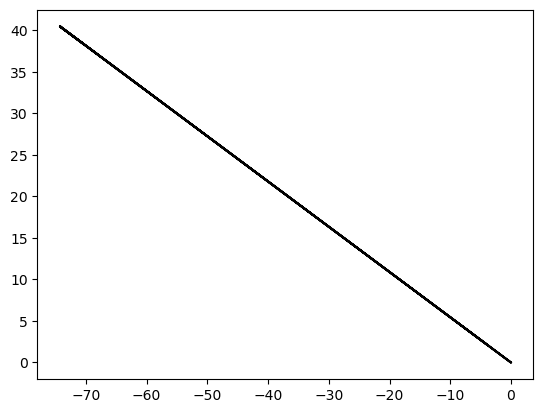

In [10]:
plt.plot(missions['INX Longitude (deg)'],missions['INX Latitude (deg)'],'k') 
#'k'creates black line (other specifiers here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

### That looks wrong. How come? Let's see the spread of our latitudes and longitudes.

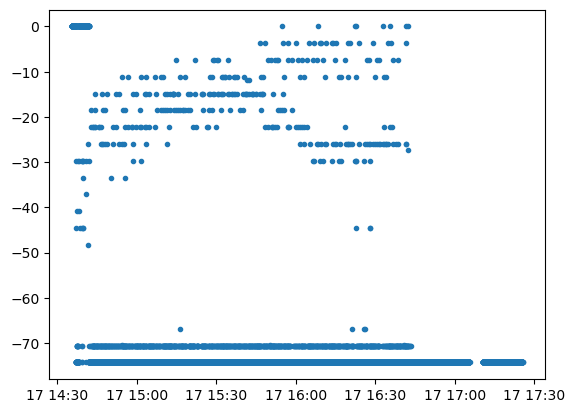

In [11]:
plt.plot(missions['INX Longitude (deg)'],'.')

Text(0, 0.5, 'Lat/Lon Spread')

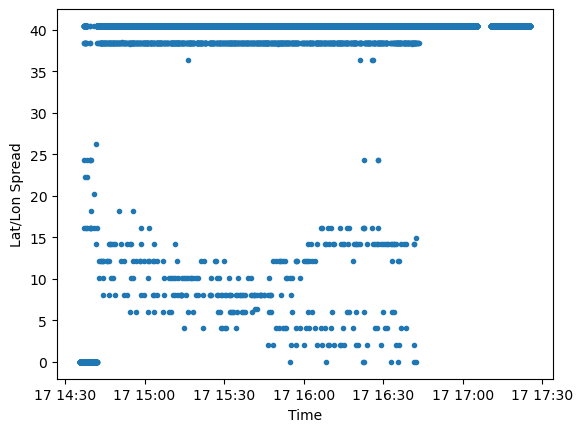

In [12]:
plt.plot(missions['INX Latitude (deg)'],'.')
plt.xlabel("Time")
plt.ylabel("Lat/Lon Spread")

### Both have some records of zeros. What caused this? 

### How about we just use a conditional index so we don't remove any data from the dataset, just from our plots.

In [13]:
conditional_index = missions['INX Longitude (deg)'] < -70
conditional_index

Timestamp (s) UTC+0
2025-04-17 14:35:30    False
2025-04-17 14:35:31    False
2025-04-17 14:35:32    False
2025-04-17 14:35:33    False
2025-04-17 14:35:34    False
                       ...  
2025-04-17 17:25:26     True
2025-04-17 17:25:27     True
2025-04-17 17:25:28     True
2025-04-17 17:25:29     True
2025-04-17 17:25:30     True
Freq: s, Name: INX Longitude (deg), Length: 10201, dtype: bool

### Now let's try plotting that again. We can also plot each mission on it's own. We can even plot just when the YUCO was actively on MISSION

TypeError: 'GeoAxes' object is not subscriptable

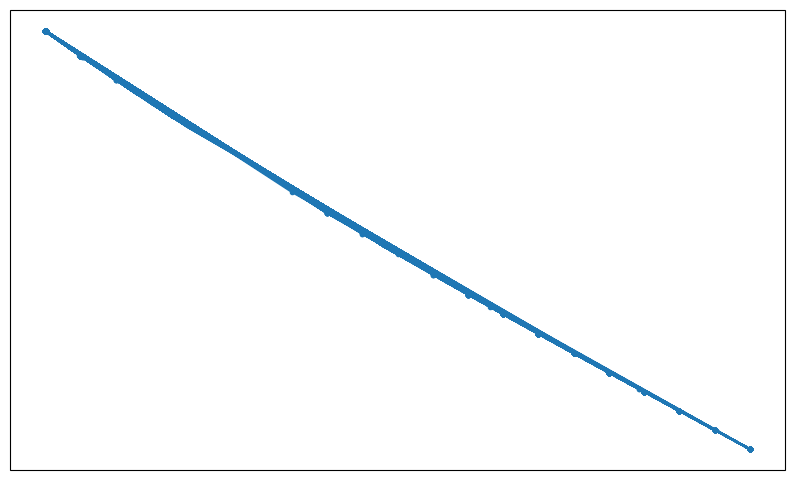

In [39]:
# Setup longitude and latitude formatters
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

# Create a single plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()}, figsize=(10, 8))

# Plot: full mission track from the missions CSV
ax.plot(
    missions['INX Longitude (deg)'],
    missions['INX Latitude (deg)'],
    '.-',
    transform=ccrs.PlateCarree()
)

# Format the plot
#ax.set_xticks([-74.270, -74.269, -74.268, -74.267], crs=ccrs.PlateCarree())
#ax.set_yticks([40.474, 40.475, 40.476, 40.477], crs=ccrs.PlateCarree())
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)
#ax.grid()
#ax.tick_params(labelrotation=30)
#ax.set_title('YUCO Mission Track')


for i in range(3):
    ax[i].set_xticks([-74.270, -74.269, -74.268, -74.267], crs=ccrs.PlateCarree())
    ax[i].set_yticks([40.474, 40.475, 40.476, 40.477], crs=ccrs.PlateCarree())
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    ax[i].grid()
    ax[i].tick_params(labelrotation=30);
    if i > 0:
        ax[i].set_yticklabels('')
        ax[i].legend(['Missions']);
plt.show()

In [15]:
# https://stackoverflow.com/questions/69465435/cartopy-show-tick-marks-of-axes
# cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                #LatitudeLocator, LongitudeLocator)
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()

#fig, axs = plt.subplots(nrows=1,ncols=3,subplot_kw={'projection': ccrs.Mercator()},figsize=(12.0,8.0)); #axs=axs.flatten()

#ax0 = axs[0].scatter(missions['INX Longitude'].where(conditional_index),missions['INX Latitude'].where(conditional_index),8,missions.index.where(conditional_index), cmap = 'jet', transform=ccrs.PlateCarree())

#axs[1].plot(mission_1['INX Longitude'].where(mission_1['INX Longitude'] < 0),mission_1['INX Latitude'].where(mission_1['INX Longitude'] < 0),'.', transform=ccrs.PlateCarree())
#axs[1].plot(mission_2['INX Longitude'].where(mission_2['INX Longitude'] < 0),mission_2['INX Latitude'].where(mission_2['INX Longitude'] < 0),'.', transform=ccrs.PlateCarree())
#axs[1].plot(mission_3['INX Longitude'].where(mission_3['INX Longitude'] < 0),mission_3['INX Latitude'].where(mission_3['INX Longitude'] < 0),'.', transform=ccrs.PlateCarree())

#axs[2].plot(mission_1['INX Longitude'].where( (mission_1['INX Longitude'] < 0) & (mission_1['AUV Status']=='MISSION') ),mission_1['INX Latitude'].where( (mission_1['INX Longitude'] < 0) & (mission_1['AUV Status']=='MISSION') ),'', transform=ccrs.PlateCarree())
#axs[2].plot(mission_2['INX Longitude'].where( (mission_2['INX Longitude'] < 0) & (mission_2['AUV Status']=='MISSION') ),mission_2['INX Latitude'].where( (mission_2['INX Longitude'] < 0) & (mission_2['AUV Status']=='MISSION') ),'', transform=ccrs.PlateCarree())
#axs[2].plot(mission_3['INX Longitude'].where( (mission_3['INX Longitude'] < 0) & (mission_3['AUV Status']=='MISSION') ),mission_3['INX Latitude'].where( (mission_3['INX Longitude'] < 0) & (mission_3['AUV Status']=='MISSION') ),'', transform=ccrs.PlateCarree())

#for i in range(3):
 #   axs[i].set_xticks([-74.220, -74.219, -74.218, -74.217, -74.216], crs=ccrs.PlateCarree())
  #  axs[i].set_yticks([39.449, 39.450, 39.451, 39.452, 39.453], crs=ccrs.PlateCarree())
   # axs[i].xaxis.set_major_formatter(lon_formatter)
   # axs[i].yaxis.set_major_formatter(lat_formatter)
   # axs[i].grid()
   # axs[i].tick_params(labelrotation=30);
   # if i > 0:
    #    axs[i].set_yticklabels('')
    #    axs[i].legend(['Mission 1','Mission 2','Mission 3']);


### What other mission statuses are there?

In [14]:
missions['AUV Status'].unique()

array(['UNDEFINED', 'HOLD', 'WARMUP', 'READY_TO_ARM', 'ARMING',
       'READY_TO_LAUNCH', 'MISSION', 'MISSION_PAUSED', None, 'RECOVERY'],
      dtype=object)

### Quite a few options! Each of these had LED colors associated with them in the YUCO manual, right? For now, let's just focus on MISSION and try plotting some more data. Let's look at the Roll, Pitch, and Yaw. Lastly we can look at Depth as well.

In [17]:
#fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12.0,5.0)); #axs=axs.flatten()
#var = ['Roll (°)', 'Pitch (°)', 'Yaw (°)','Depth (m)'];

#axs[0].plot(missions.index,np.degrees(missions.Roll),'r.')
#axs[0].plot(missions.index.where(missions['AUV Status'] == 'MISSION'),np.degrees(missions.Roll.where(missions['AUV Status'] == 'MISSION')),'g.')
# axs[0].set_ylim(-2,2)

#axs[1].plot(missions.index,np.degrees(missions.Pitch),'r.')
#axs[1].plot(missions.index.where(missions['AUV Status'] == 'MISSION'),np.degrees(missions.Pitch.where(missions['AUV Status'] == 'MISSION')),'g.')

#axs[2].plot(missions.index,np.degrees(missions.Yaw),'r.')
#axs[2].plot(missions.index.where(missions['AUV Status'] == 'MISSION'),np.degrees(missions.Yaw.where(missions['AUV Status'] == 'MISSION')),'g.')

#axs[3].plot(missions.index,-missions['Depth (m)'],'r.')
#axs[3].plot(missions.index.where(missions['AUV Status'] == 'MISSION'),-missions['Depth (m)'].where(missions['AUV Status'] == 'MISSION'),'g.')
#axs[3].plot(missions.index,-missions['Altitude (m)']-missions['Depth (m)'],'k.')

#for i in range(4):
 #   axs[i].grid()
  #  axs[i].set_ylabel(var[i])
   # if i < 3:
    #    axs[i].set_xticklabels('')


### What do we see? What exactly are Roll, Pitch, Yaw?

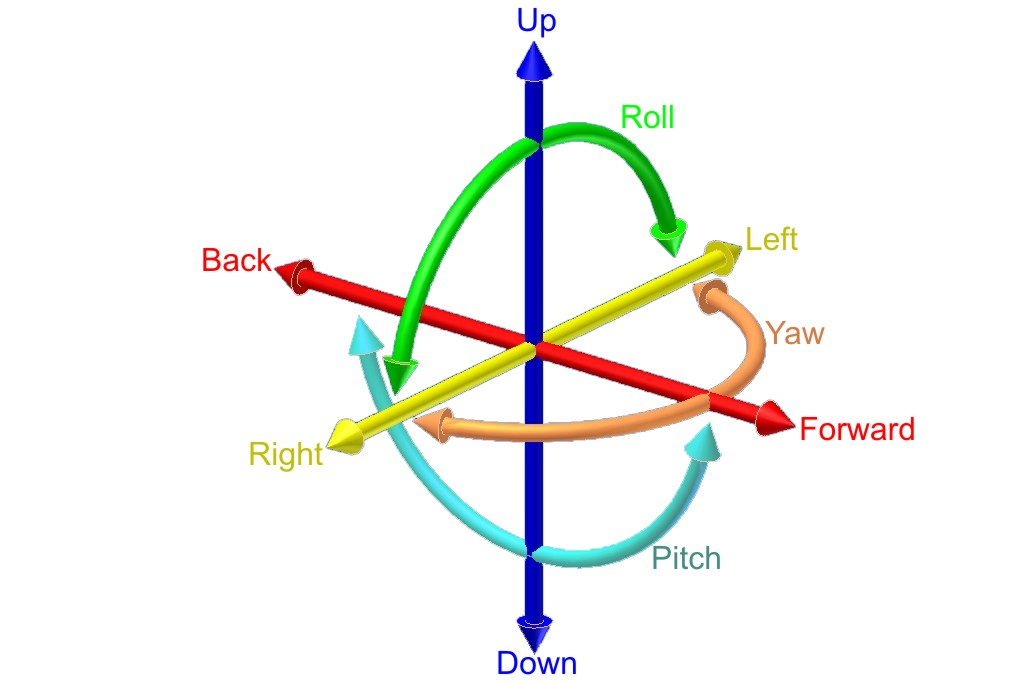

### How do we visualize these for gliders?
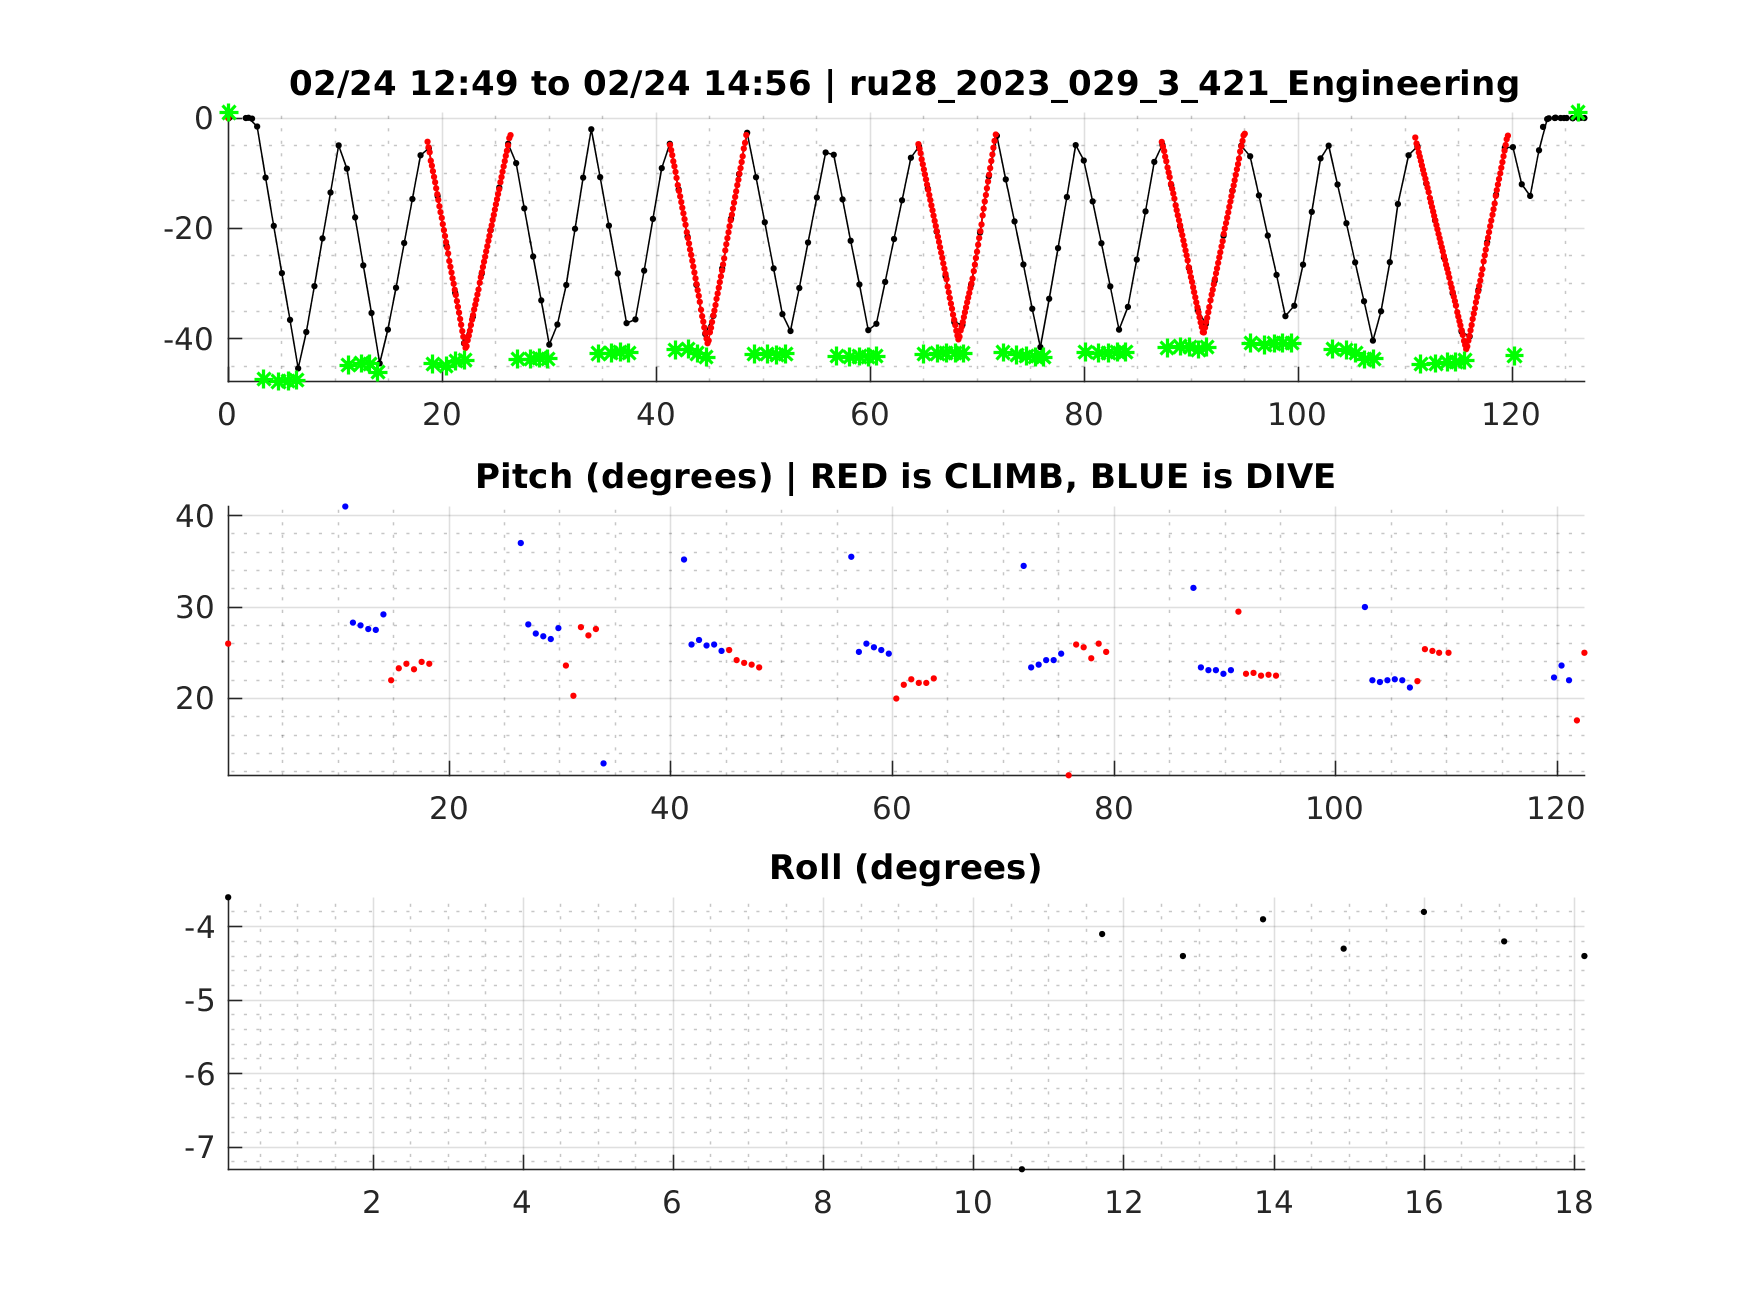

### Is there a better way to visualize these? These are often called Tait–Bryan angles, a type of Euler_angles. (These names are helpful when looking up visualization methods!)

In [18]:
import time; start = time.time()

# i = 0;

# roll  = missions.Roll.values[i]
# pitch = missions.Pitch.values[i]
# yaw   = missions.Yaw.values[i]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# lim = 90
# # Cartesian axes
# ax.quiver(-lim, 0, 0, 2*lim, 0, 0, color='#aaaaaa',linestyle='dashed')
# ax.quiver(0, -lim, 0, 0, 2*lim, 0, color='#aaaaaa',linestyle='dashed')
# ax.quiver(0, 0, -lim, 0, 0, 2*lim, color='#aaaaaa',linestyle='dashed')
# # Vector 
# q = ax.quiver(0, 0, 0, np.degrees(roll), np.degrees(pitch), np.degrees(yaw), color='r')
# ax.set_xlim([-lim,lim]);
# ax.set_ylim([-lim,lim]);
# ax.set_zlim([-lim,lim]);
# ax.set_xlabel('Pitch (Deg)')
# ax.set_ylabel('Roll (Deg)')
# ax.set_zlabel('Yaw (Deg)')
# timestamp = ax.text(-150,0,150,'',fontsize=12,fontweight='bold')

# def update_quiver(i):
#     global q; q.remove() # Clears previous vector

#     # updates the horizontal and vertical vector components by a fixed increment on each frame
#     roll  = missions.Roll.values[i]
#     pitch = missions.Pitch.values[i]
#     yaw   = missions.Yaw.values[i]
    
#     if (missions['AUV Status'].values[i]=='MISSION') | (missions['AUV Status'].values[i]=='READY_TO_LAUNCH'):
#         vec_color = 'g'
#     elif (missions['AUV Status'].values[i]=='READY_TO_ARM') | (missions['AUV Status'].values[i]=='ARMING'): 
#         vec_color = 'b'
#     elif (missions['AUV Status'].values[i]=='WAITING_GPS') | (missions['AUV Status'].values[i]=='WARMUP'): 
#         vec_color = 'y'
#     elif (missions['AUV Status'].values[i]=='RECOVERY'): 
#         vec_color = 'k'
#     else:
#         vec_color = 'r'

#     q= ax.quiver(0, 0, 0, np.degrees(roll), np.degrees(pitch), np.degrees(yaw), color=vec_color)
#     timestamp.set_text('Status: ' + (str(missions['AUV Status'].values[i]) if missions['AUV Status'].values[i] is not None else ''))
#     timestamp.set_color(vec_color)
#     return 

# anim = animation.FuncAnimation(fig, update_quiver,frames = len(missions), interval=100)
# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# anim.save('seaber_pitchrollyaw.mp4', writer='ffmpeg')
# plt.close()

# end = time.time(); print(end - start)

In [19]:
from IPython.display import Video
Video("seaber_pitchrollyaw.mp4")

### Admittedly 3D might not be the best option. What if we could visualize it like this example animation from Wikipedia, or even a full 3D shot?
[![image.gif](https://upload.wikimedia.org/wikipedia/commons/8/85/Euler2a.gif)](https://upload.wikimedia.org/wikipedia/commons/8/85/Euler2a.gif)
[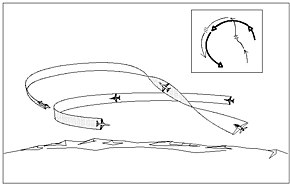](https://stackoverflow.com/questions/73152653/animated-flight-path-plot-in-python)

### Something to aspire to perhaps!


### <span style='color:Blue'> Let's take a look at the battery useage over time.  </span>

In [19]:
#plt.plot(missions['Battery Charge (%)'],'.')
#plt.xlabel("Time")
#plt.ylabel("Battery Percentage")

### <span style='color:Blue'> Could the three battery drop moments be caused by the side-scan starting up?  </span>
### <span style='color:Blue'> Convert Y/N in Scan Recording column to 1s and 0s so they appear as integers, and then plot.</span>

In [15]:
# with help on integer conversion from: https://www.includehelp.com/python/change-a-column-of-yes-or-no-to-1-or-0-in-a-pandas-dataframe.aspx
missions_scan = missions['Scan Recording (Y/N)'].map ({'Y': 1, 'N': 0}) 
missions_scan

Timestamp (s) UTC+0
2025-04-17 14:35:30    0.0
2025-04-17 14:35:31    0.0
2025-04-17 14:35:32    0.0
2025-04-17 14:35:33    0.0
2025-04-17 14:35:34    0.0
                      ... 
2025-04-17 17:25:26    0.0
2025-04-17 17:25:27    0.0
2025-04-17 17:25:28    0.0
2025-04-17 17:25:29    0.0
2025-04-17 17:25:30    0.0
Freq: s, Name: Scan Recording (Y/N), Length: 10201, dtype: float64

Text(0, 0.5, 'Sidescan On (1) vs Off (0)')

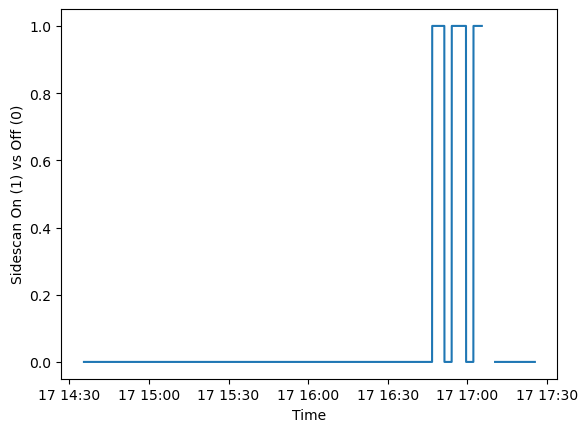

In [16]:
plt.plot(missions_scan), '.'
plt.xlabel("Time")
plt.ylabel("Sidescan On (1) vs Off (0)")

### Although this plot helps to show the timestamp of when the side-scan was on and off, it doesn't necessarily align with the power drains.
### However, the low points on the battery plot do correspond with the breaks in the roll, pitch, and yaw plots. So the power-up of the YUCO's motor at the start of each mission is more likely the cause.

### <span style='color:Blue'> One of the concerns when running the YUCO is making sure the board does not overheat. Let's check the temperature of the board inside the unit, compared to the outside temperature of the unit.</span>

In [23]:
#plt.plot(missions['Internal Temperature (C)'], -missions['Depth (m)'], 'r.')
#plt.plot(missions['External Temperature (C)'], -missions['Depth (m)'], 'b.')
#plt.xlabel("Degrees (C)")
#plt.ylabel("Depth (m)")
#plt.legend(["Internal Temp", "External Temp"], loc ="center") 

### The outside temperature range is 4-16 deg C. The higher temperature at zero depth is probably due to time spent on the ship's deck while turned on. 
### The board temperature inside is 16.25 - 19 deg C. The higher temperature at zero depth may also be attributed to its time on the ship's deck while turned on.


### <span style='color:Blue'> Here's another view of the temperatures over time.</span> 

In [24]:
#plt.plot(missions['Internal Temperature (C)'], 'r.')
#plt.plot(missions['External Temperature (C)'], 'b.')
#plt.xlabel("Time")
#plt.ylabel("Degrees (C)")
#plt.legend(["Internal Temp", "External Temp"], loc ="center") 

### <span style='color:Blue'> We can also compare the internal pressure vs. the external pressure of the YUCO.</span> 

In [25]:
#plt.plot(missions['Internal Pressure (bar)'], -missions['Depth (m)'], 'm.')
#plt.plot(missions['External Pressure (bar)'], -missions['Depth (m)'], 'y.')
#plt.plot(missions['Internal Pressure (bar)'], 'm.')
#plt.plot(missions['External Pressure (bar)'], 'y.')
#plt.xlabel("Pressure (bar)")
#plt.ylabel("Depth (m)")
#plt.legend(["Internal Pressure", "External Pressure"], loc ="upper right") 

### The inside pressure of the YUCO is maintained, while the external pressure increases with depth.

### <span style='color:Blue'> Now let's look at the pressures over time.</span> 

In [26]:
#plt.plot(missions['Internal Pressure (bar)'], 'm.')
#plt.plot(missions['External Pressure (bar)'], 'y.')
#plt.xlabel("Time")
#plt.ylabel("Pressure (bar)")
#plt.legend(["Internal Pressure", "External Pressure"], loc ="upper left") 

### The three missions are very clear looking at the pressure change.

# SideScan Data!
## First open a shell and run `pip install pyxtf` or try the commented line below. This installs [pyxtf](https://github.com/oysstu/pyxtf), "a python library for reading [eXtended Triton Format (XTF) files](https://www3.mbari.org/products/mbsystem/formatdoc/XtfFileFormat_X26.pdf)." The side-scan sonars made by [DeepVision](https://deepvision.se/products/side-scan-sonars/) output into a proprietary format *.dvs* that are optimized for their own software. However, they also output the same information as *.xtf* files, which are more openly readable.
*Much of this .xtf intro is taken from [pyxtf's example notebook](https://github.com/oysstu/pyxtf/blob/master/examples/sonar_example.ipynb)*

In [17]:
#!pip install pyxtf
import pyxtf

### Read the test file

In [28]:
#test_file = './exports/003300173131511938383732_20230222_162629_scans/003300173131511938383732_20230222_162629_0.xtf'
#(fh, p) = pyxtf.xtf_read(test_file)

### Print XTFFileHeader

In [30]:
# This prints all the ctypes fields present
#print(fh)

### Print XTFChanInfo belonging to the first channel

In [30]:
# The ChanInfo field is an array of XTFChanInfo objects
# Note that the ChanInfo field always has a size of 6, even if the number of channels is less. 
# Use the fh.NumXChannels fields to calculate the number (the function xtf_channel_count does this)
n_channels = fh.channel_count(verbose=True)
actual_chan_info = [fh.ChanInfo[i] for i in range(0, n_channels)]
print('Number of data channels: {}\n'.format(n_channels))

# Print the first channel
print(actual_chan_info[0])

XTF Channels: sonar=2, bathy=0, snippet=0, forward=0, echo=0, interferometry=0
Number of data channels: 2

TypeOfChannel: 1
SubChannelNumber: 0
CorrectionFlags: 1
UniPolar: 0
BytesPerSample: 1
Reserved: 0
ChannelName: b'DV Port'
VoltScale: 0.0
Frequency: 680000.0
HorizBeamAngle: 0.0
TiltAngle: 0.0
BeamWidth: 0.0
OffsetX: 0.0
OffsetY: 0.0
OffsetZ: 0.0
OffsetYaw: 0.0
OffsetPitch: 0.0
OffsetRoll: 0.0
BeamsPerArray: 0
SampleFormat: 8
ReservedArea2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '...', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



### Inspect the type of packets returned in the packets dictionary

In [31]:
# Print the keys in the packets-dictionary
print([key for key in p])

[<XTFHeaderType.sonar: 0>]


In [32]:
# The returned packets is a Dict[XTFHeaderType, List[XTFClass]]
# The values in the dict are lists of pings, of the class in question
sonar_ch = p[pyxtf.XTFHeaderType.sonar]  # type: List[pyxtf.XTFPingHeader]

# Each element in the list is a ping (XTFPingHeader)
# This retrieves the first ping in the file of the sonar type
sonar_ch_ping1 = sonar_ch[0]

# The properties in the header defines the attributes common for all subchannels 
# (e.g sonar often has port/stbd subchannels)
print(sonar_ch_ping1)

MagicNumber: 64206
HeaderType: 0
SubChannelNumber: 0
NumChansToFollow: 2
Reserved1: [0, 0]
NumBytesThisRecord: 2384
Year: 2023
Month: 2
Day: 22
Hour: 16
Minute: 33
Second: 37
HSeconds: 61
JulianDay: 0
EventNumber: 0
PingNumber: 0
SoundVelocity: 1500.0
OceanTide: 0.0
Reserved2: 0
ConductivityFreq: 0.0
TemperatureFreq: 0.0
PressureFreq: 0.0
PressureTemp: 0.0
Conductivity: 0.0
WaterTemperature: 0.0
Pressure: 0.0
ComputedSoundVelocity: 0.0
MagX: 0.0
MagY: 0.0
MagZ: 0.0
AuxVal1: 0.0
AuxVal2: 0.0
AuxVal3: 0.0
AuxVal4: 0.0
AuxVal5: 0.0
AuxVal6: 0.0
SpeedLog: 0.0
Turbidity: 0.0
ShipSpeed: 0.0
ShipGyro: 0.0
ShipYcoordinate: 0.0
ShipXcoordinate: 0.0
ShipAltitude: 0
ShipDepth: 0
FixTimeHour: 16
FixTimeMinute: 33
FixTimeSecond: 37
FixTimeHsecond: 61
SensorSpeed: 0.034308016300201416
KP: 0.0
SensorYcoordinate: 39.45195768923109
SensorXcoordinate: -74.21810027773672
SonarStatus: 0
RangeToFish: 0
BearingToFish: 0
CableOut: 0
Layback: 0.0
CableTension: 0.0
SensorDepth: 0.861223578453064
SensorPrimaryA

### Inspect the subchannels in the first sonar package (in this case there are two)

In [33]:
# The data and header for each subchannel is contained in the data and ping_chan_headers respectively.
# The data is a list of numpy arrays (one for each subchannel)
sonar_subchan0 = sonar_ch_ping1.data[0]  # type: np.ndarray
sonar_subchan1 = sonar_ch_ping1.data[1]  # type: np.ndarray

print(sonar_subchan0.shape)
print(sonar_subchan1.shape)

(1000,)
(1000,)


### Plot a signal-view of both subchannels of the first ping

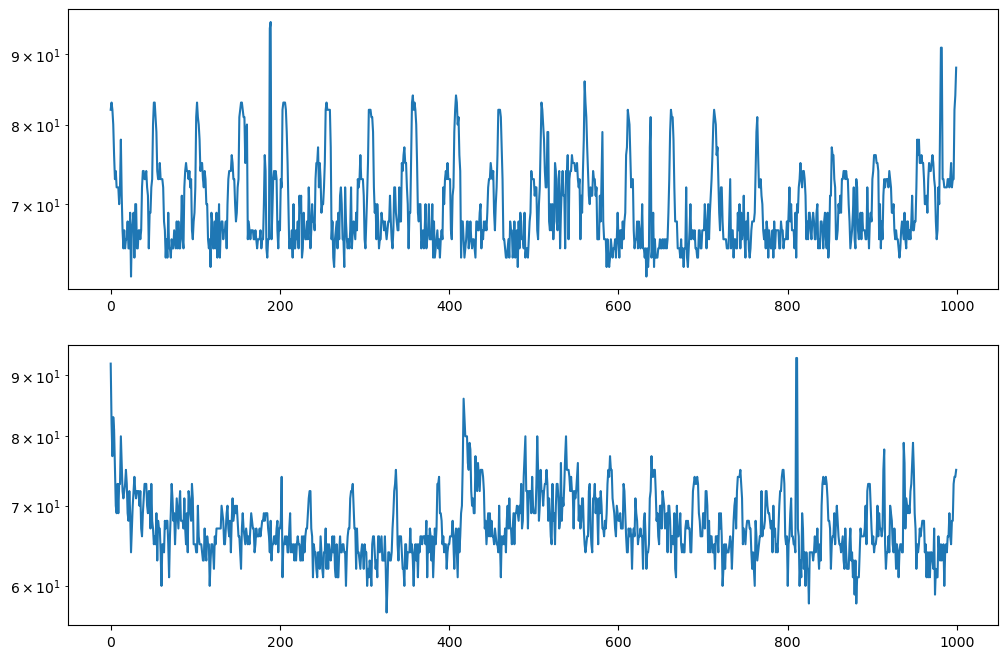

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
ax1.semilogy(np.arange(0, sonar_subchan0.shape[0]), sonar_subchan0)
ax2.semilogy(np.arange(0, sonar_subchan1.shape[0]), sonar_subchan1)

In [35]:
# Each subchannel has a XTFPingChanHeader, 
# which contains information that can change from ping to ping in each of the subchannels
sonar_ping1_ch_header0 = sonar_ch_ping1.ping_chan_headers[0]
print(sonar_ping1_ch_header0)

ChannelNumber: 0
DownsampleMethod: 4
SlantRange: 40.0
GroundRange: 1599.0
TimeDelay: 0.0
TimeDuration: 0.0533333346247673
SecondsPerPing: 0.0533333346247673
ProcessingFlags: 0
Frequency: 24640
InitialGainCode: 0
GainCode: 0
BandWidth: 0
ContactNumber: 0
ContactClassification: 0
ContactSubNumber: 0
ContactType: 0
NumSamples: 1000
MillivoltScale: 0
ContactTimeOffTrack: 0.0
ContactCloseNumber: 0
Reserved2: 0
FixedVSOP: 0.18297609686851501
Weight: 0
ReservedSpace: [0, 0, 0, 0]



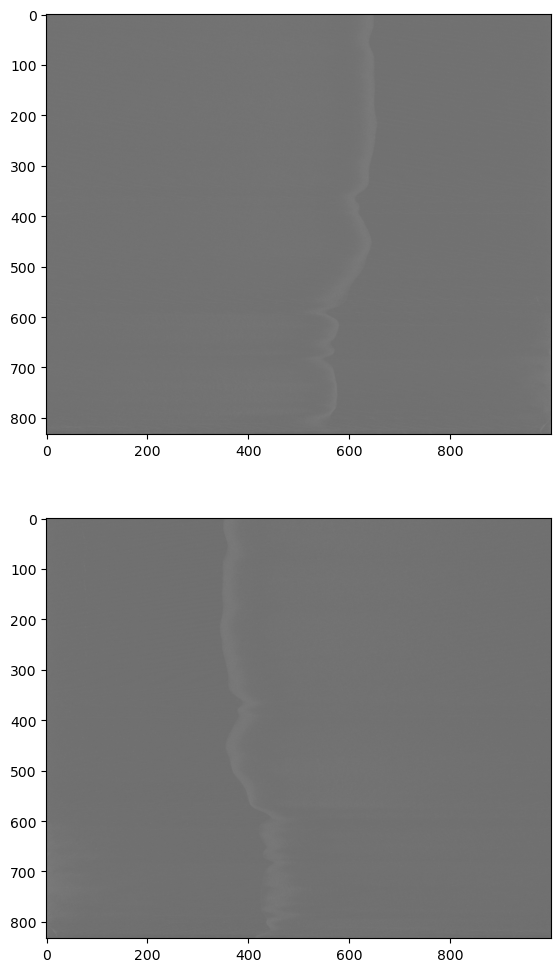

In [36]:
# The function concatenate_channels concatenates all the individual pings for a channel, and returns it as a dense numpy array
np_chan1 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=0, weighted=True)
np_chan2 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=1, weighted=True)


# Clip to range (max cannot be used due to outliers)
# More robust methods are possible (through histograms / statistical outlier removal)
upper_limit = 2 ** 14
np_chan1.clip(0, upper_limit-1, out=np_chan1)
np_chan2.clip(0, upper_limit-1, out=np_chan2)

# The sonar data is logarithmic (dB), add small value to avoid log10(0)
np_chan1 = np.log10(np_chan1 + 0.0001)
np_chan2 = np.log10(np_chan2 + 0.0001)

# Transpose so that the largest axis is horizontal
np_chan1 = np_chan1 if np_chan1.shape[0] < np_chan1.shape[1] else np_chan1.T
np_chan2 = np_chan2 if np_chan2.shape[0] < np_chan2.shape[1] else np_chan2.T

# The following plots the waterfall-view in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.imshow(np_chan1, cmap='gray', vmin=0, vmax=np.log10(upper_limit))
ax2.imshow(np_chan2, cmap='gray', vmin=0, vmax=np.log10(upper_limit))

## Now let's improve on this and make our own plots
First set up all the paths for the scan outputs

In [37]:
#mission_1_scan_0 = './exports/003300173131511938383732_20230222_162629_scans/003300173131511938383732_20230222_162629_0.xtf'
#mission_1_scan_1 = './exports/003300173131511938383732_20230222_162629_scans/003300173131511938383732_20230222_162629_1.xtf'
#mission_1_scan_2 = './exports/003300173131511938383732_20230222_162629_scans/003300173131511938383732_20230222_162629_2.xtf'
#mission_1_scan_3 = './exports/003300173131511938383732_20230222_162629_scans/003300173131511938383732_20230222_162629_3.xtf'

#mission_2_scan_0 = './exports/003300173131511938383732_20230222_164209_scans/003300173131511938383732_20230222_164209_0.xtf'
#mission_2_scan_1 = './exports/003300173131511938383732_20230222_164209_scans/003300173131511938383732_20230222_164209_1.xtf'
#mission_2_scan_2 = './exports/003300173131511938383732_20230222_164209_scans/003300173131511938383732_20230222_164209_2.xtf'
#mission_2_scan_3 = './exports/003300173131511938383732_20230222_164209_scans/003300173131511938383732_20230222_164209_3.xtf'

#mission_3_scan_0 = './exports/003300173131511938383732_20230222_171032_scans/003300173131511938383732_20230222_171032_0.xtf'
#mission_3_scan_1 = './exports/003300173131511938383732_20230222_171032_scans/003300173131511938383732_20230222_171032_1.xtf'
#mission_3_scan_2 = './exports/003300173131511938383732_20230222_171032_scans/003300173131511938383732_20230222_171032_2.xtf'
#mission_3_scan_3 = './exports/003300173131511938383732_20230222_171032_scans/003300173131511938383732_20230222_171032_3.xtf'

#scan_file_paths = [mission_1_scan_0, mission_1_scan_1, mission_1_scan_2, mission_1_scan_3, \
 #                  mission_2_scan_0, mission_2_scan_1, mission_2_scan_2, mission_2_scan_3, \
  #                 mission_3_scan_0, mission_3_scan_1, mission_3_scan_2, mission_3_scan_3]

In [18]:
mission_1_scan_0 = "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_1.xtf"
mission_1_scan_1 = "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_2.xtf"
mission_1_scan_2 = "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_3.xtf"

scan_file_paths = [mission_1_scan_0, mission_1_scan_1, mission_1_scan_2]

### Plot the sidescan data for the 12 scans

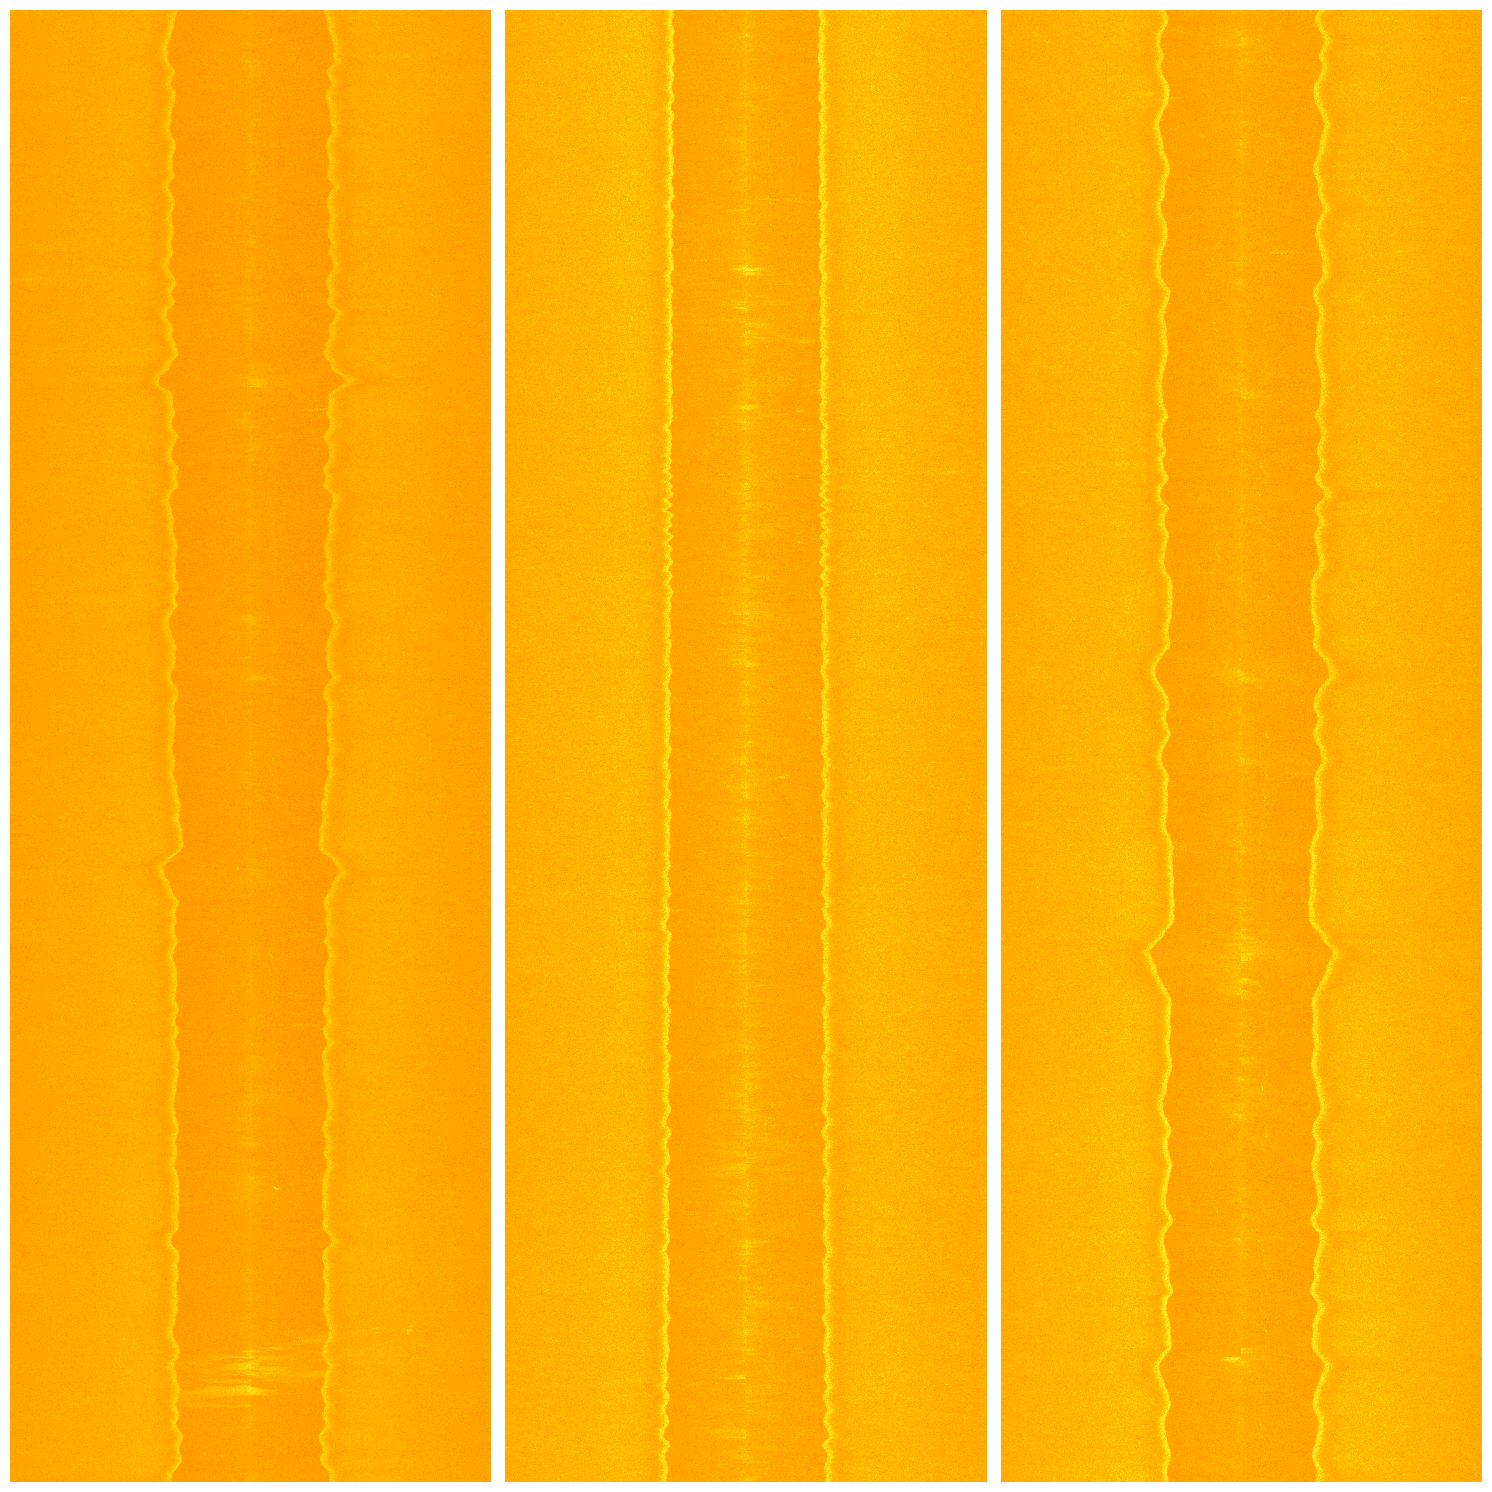

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15.0,15.0)); axs=axs.flatten()

for i in range(3):
    (fh, p)  = pyxtf.xtf_read(scan_file_paths[i])
    np_chan1 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=0)
    np_chan2 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=1)
    np_chans = np.flipud(np.hstack((np_chan1,np_chan2)))
    axs[i].pcolormesh(np_chans,cmap='Wistia_r');
    axs[i].axis('off');

plt.tight_layout(pad=1, h_pad=1, w_pad=1)
 

# mpatches

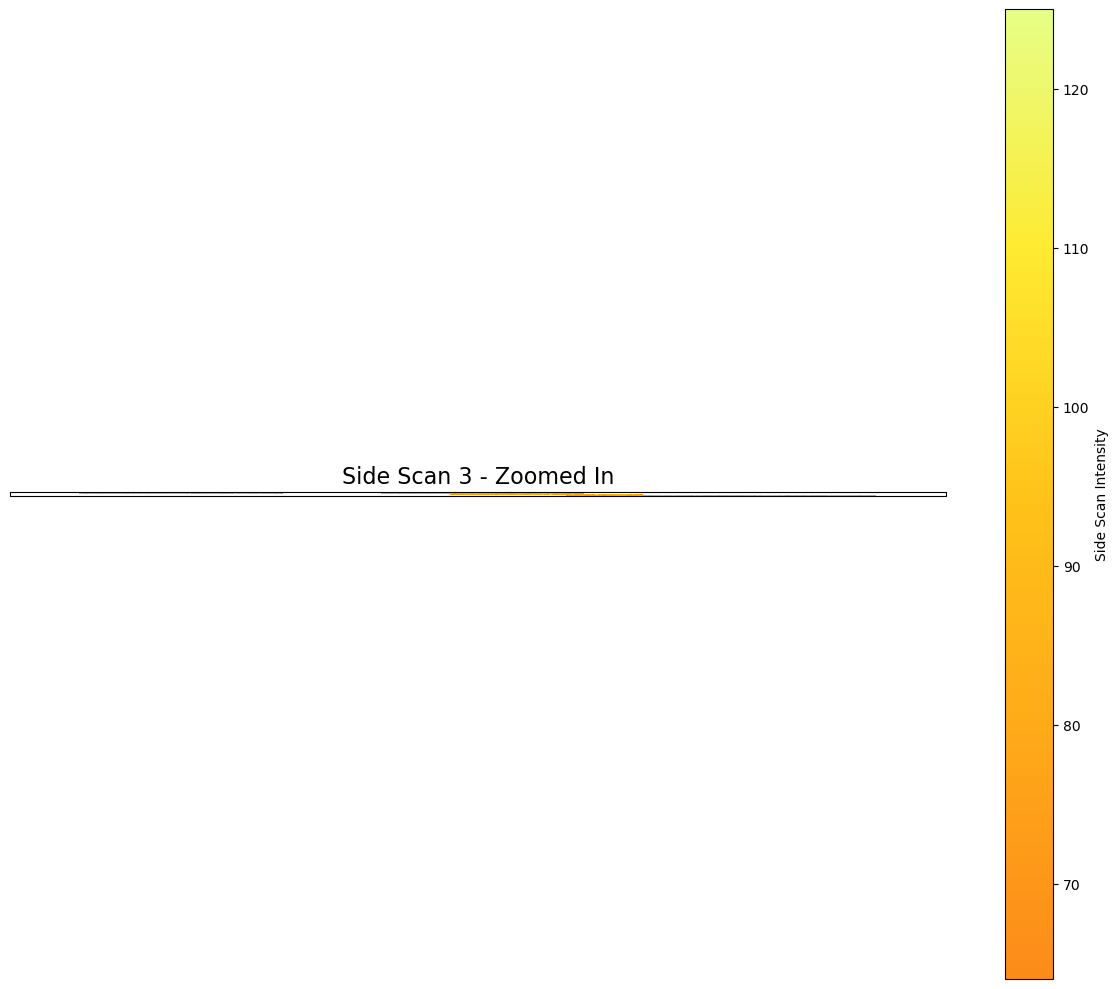

In [22]:
from scipy.ndimage import zoom
from math import asin, atan2, cos, degrees, radians, sin
# Helper: get point at distance and bearing
def get_point_at_distance(lat1, lon1, d, bearing, R=6371):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    a = radians(bearing)
    lat2 = asin(sin(lat1) * cos(d/R) + cos(lat1) * sin(d/R) * cos(a))
    lon2 = lon1 + atan2(
        sin(a) * sin(d/R) * cos(lat1),
        cos(d/R) - sin(lat1) * sin(lat2)
    )
    return (degrees(lat2), degrees(lon2))

# Load the third scan
scan_path = "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_3.xtf"

(fh, p) = pyxtf.xtf_read(scan_path)
sonar_packets = p[pyxtf.XTFHeaderType.sonar]

# Read sonar data
n_pings = len(sonar_packets)
np_chan1 = pyxtf.concatenate_channel(sonar_packets, file_header=fh, channel=0)
np_chan2 = pyxtf.concatenate_channel(sonar_packets, file_header=fh, channel=1)
np_chans = np.hstack((np_chan1, np_chan2))

# Downsample across-beam to speed up
factor = 50 / np_chans.shape[1]  # Target ~50 points across
np_chans_down = zoom(np_chans, (1, factor), order=1)

n_samples = np_chans_down.shape[1] // 2

# Build coordinate grids
lon_left = np.zeros((n_pings, n_samples))
lat_left = np.zeros((n_pings, n_samples))
lon_right = np.zeros((n_pings, n_samples))
lat_right = np.zeros((n_pings, n_samples))

for j, ping in enumerate(sonar_packets):
    x = ping.SensorXcoordinate
    y = ping.SensorYcoordinate

    lat_l, lon_l = get_point_at_distance(y, x, 0.040, 90)
    lat_r, lon_r = get_point_at_distance(y, x, 0.040, -90)

    lon_left[j, :] = np.linspace(x, lon_l, n_samples)
    lat_left[j, :] = np.linspace(y, lat_l, n_samples)
    lon_right[j, :] = np.linspace(x, lon_r, n_samples)
    lat_right[j, :] = np.linspace(y, lat_r, n_samples)

# Combine left and right sides
lons = np.vstack((np.flipud(lon_left.T), lon_right.T))
lats = np.vstack((lat_left.T, lat_right.T))

# ------------- Plot Only the Side Scan -------------
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.Mercator()})

# Set tight zoom extent
lon_min = lons.min()
lon_max = lons.max()
lat_min = lats.min()
lat_max = lats.max()

# Add a little padding for nice framing
lon_pad = (lon_max - lon_min) * 0.05
lat_pad = (lat_max - lat_min) * 0.05

ax.set_extent([lon_min - lon_pad, lon_max + lon_pad, lat_min - lat_pad, lat_max + lat_pad], crs=ccrs.PlateCarree())

# Plot the side scan swath
scan = ax.pcolormesh(lons, lats, np_chans_down.T, cmap='Wistia_r', shading='auto', alpha=0.9, transform=ccrs.PlateCarree())

# Grid and Labels
ax.grid(True)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(labelrotation=30)

ax.set_xlabel('Longitude (deg)', fontsize=12)
ax.set_ylabel('Latitude (deg)', fontsize=12)
ax.set_title('Side Scan 3 - Zoomed In', fontsize=16)

plt.colorbar(scan, ax=ax, orientation='vertical', label='Side Scan Intensity')

plt.tight_layout()
plt.show()

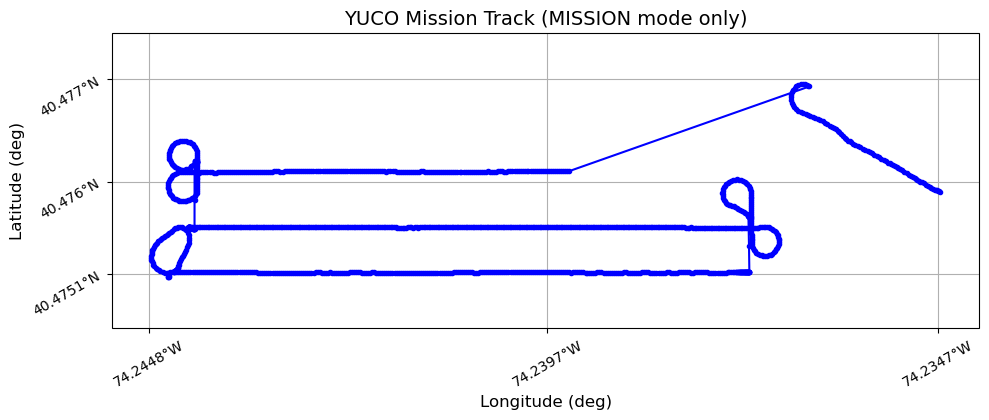

In [20]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 2. Filter to MISSION mode only with real coordinates
missions = missions[(missions['INX Longitude (deg)'] != 0.0) &
                    (missions['INX Latitude (deg)'] != 0.0) &
                    (missions['AUV Status'] == 'MISSION')]

# 3. Bounds with padding
lon_min = missions['INX Longitude (deg)'].min()
lon_max = missions['INX Longitude (deg)'].max()
lat_min = missions['INX Latitude (deg)'].min()
lat_max = missions['INX Latitude (deg)'].max()

lon_pad = 0.0005
lat_pad = 0.0005

# 4. Set up map
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Mercator()})
ax.set_extent([lon_min - lon_pad, lon_max + lon_pad, lat_min - lat_pad, lat_max + lat_pad], crs=ccrs.PlateCarree())

# 5. Plot mission track
ax.plot(
    missions['INX Longitude (deg)'],
    missions['INX Latitude (deg)'],
    '.-', color='blue',
    transform=ccrs.PlateCarree()
)

# 6. Format ticks
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_xticks([round(lon_min, 4), round((lon_min + lon_max) / 2, 4), round(lon_max, 4)], crs=ccrs.PlateCarree())
ax.set_yticks([round(lat_min, 4), round((lat_min + lat_max) / 2, 4), round(lat_max, 4)], crs=ccrs.PlateCarree())
ax.tick_params(labelrotation=30)

# 7. Axis labels and title
ax.set_xlabel('Longitude (deg)', fontsize=12)
ax.set_ylabel('Latitude (deg)', fontsize=12)
ax.set_title('YUCO Mission Track (MISSION mode only)', fontsize=14)
ax.grid(True)

plt.tight_layout()
plt.show()

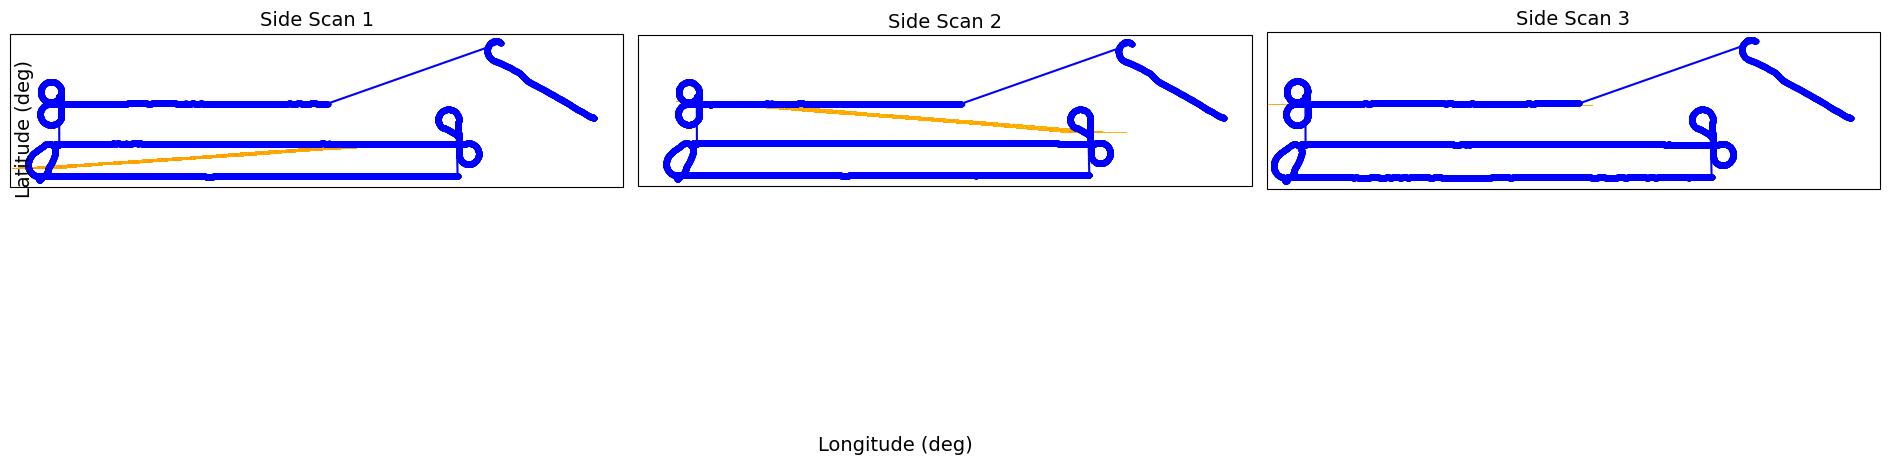

In [66]:
from math import asin, atan2, cos, degrees, radians, sin
from scipy.ndimage import zoom

# Helper function
def get_point_at_distance(lat1, lon1, d, bearing, R=6371):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    a = radians(bearing)
    lat2 = asin(sin(lat1) * cos(d/R) + cos(lat1) * sin(d/R) * cos(a))
    lon2 = lon1 + atan2(
        sin(a) * sin(d/R) * cos(lat1),
        cos(d/R) - sin(lat1) * sin(lat2)
    )
    return (degrees(lat2), degrees(lon2))



missions = missions[(missions['INX Longitude (deg)'] != 0.0) &
                    (missions['INX Latitude (deg)'] != 0.0) &
                    (missions['AUV Status'] == 'MISSION')]

# 2. Set up the side scan files
scan_file_paths = [
    "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_1.xtf",
    "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_2.xtf",
    "C:/Users/csmit/OneDrive/Desktop/YUCO/20250417_143530_1_2025-04-15-Bay/scans/scan_corrected_20250417_143530_1_2025-04-15-Bay_3.xtf"
]

# 3. Set up figure with 3 subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), subplot_kw={'projection': ccrs.Mercator()})
axs = axs.flatten()

# Plot loop
for i, file_path in enumerate(scan_file_paths):
    ax = axs[i]

    # Plot mission track
    ax.plot(
        missions['INX Longitude (deg)'],
        missions['INX Latitude (deg)'],
        '.-', color='blue', linewidth=1.5,
        label='Mission Track',
        transform=ccrs.PlateCarree()
    )

    # Load side scan data
    (fh, p) = pyxtf.xtf_read(file_path)
    sonar_packets = p[pyxtf.XTFHeaderType.sonar]
    
    n_pings = len(sonar_packets)
    np_chan1 = pyxtf.concatenate_channel(sonar_packets, file_header=fh, channel=0)
    np_chan2 = pyxtf.concatenate_channel(sonar_packets, file_header=fh, channel=1)
    np_chans = np.hstack((np_chan1, np_chan2))

    # Downsample across the swath
    factor = 50 / np_chans.shape[1]  # Target ~50 samples
    np_chans_down = zoom(np_chans, (1, factor), order=1)

    n_samples = np_chans_down.shape[1] // 2

    # Build left/right coordinate grids
    lon_left = np.zeros((n_pings, n_samples))
    lat_left = np.zeros((n_pings, n_samples))
    lon_right = np.zeros((n_pings, n_samples))
    lat_right = np.zeros((n_pings, n_samples))

    for j, ping in enumerate(sonar_packets):
        x = ping.SensorXcoordinate
        y = ping.SensorYcoordinate

        lat_l, lon_l = get_point_at_distance(y, x, 0.040, 90)
        lat_r, lon_r = get_point_at_distance(y, x, 0.040, -90)

        lon_left[j, :] = np.linspace(x, lon_l, n_samples)
        lat_left[j, :] = np.linspace(y, lat_l, n_samples)
        lon_right[j, :] = np.linspace(x, lon_r, n_samples)
        lat_right[j, :] = np.linspace(y, lat_r, n_samples)

    lons = np.vstack((np.flipud(lon_left.T), lon_right.T))
    lats = np.vstack((lat_left.T, lat_right.T))

    # Plot side scan swath
    ax.pcolormesh(lons, lats, np_chans_down.T, cmap='Wistia_r', alpha=0.9, shading='auto', transform=ccrs.PlateCarree())

    # Add formatting
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.grid(True)
    ax.tick_params(labelrotation=30)
    ax.set_title(f'Side Scan {i+1}', fontsize=14)

# Set global labels outside subplots
fig.text(0.5, 0.04, 'Longitude (deg)', ha='center', fontsize=14)
fig.text(0.06, 0.5, 'Latitude (deg)', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

### Show larger plot that shows the track and the side scans lined up with thetracks

### remove nadir gap from data

### line up nadir removed on new tracks

### These are static plots, just like the DeepVision software creates. Are there other ways to animate this sort of data? What about in 3D?

RuntimeError: Requested MovieWriter (ffmpeg) not available

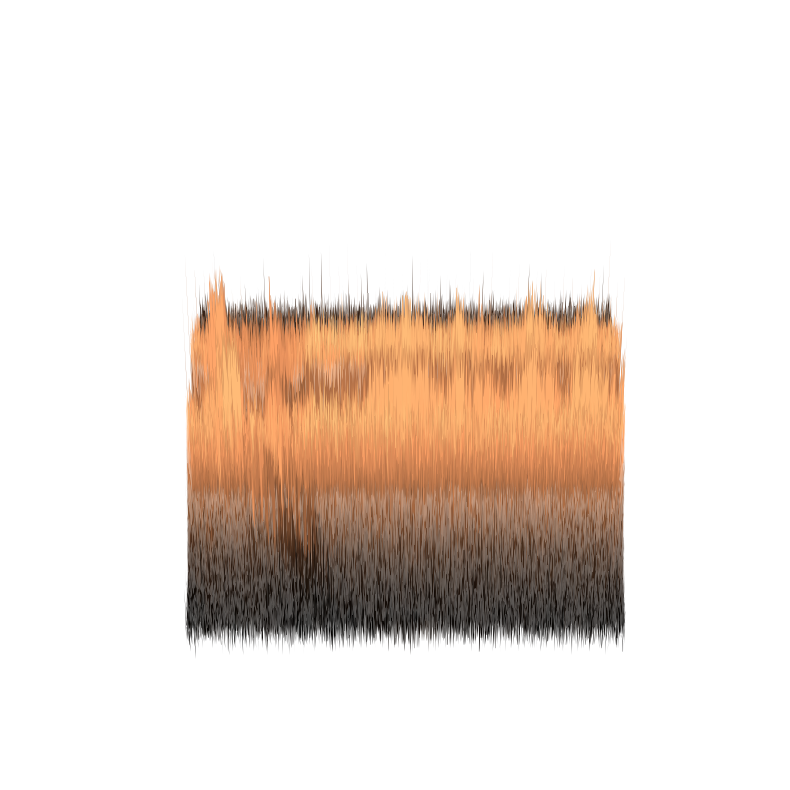

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

i=10
(fh, p)  = pyxtf.xtf_read(scan_file_paths[i])
np_chan1 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=0)
np_chan2 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=1)
np_chans = np.flipud(np.hstack((np_chan1,np_chan2)))


x=np.linspace(0,np_chans.shape[0],np_chans.shape[0])
y=np.linspace(0,np_chans.shape[1],np_chans.shape[1])

X, Y = np.meshgrid(y,x)
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"});
ax.plot_surface(X,Y,np_chans,cmap='copper')
ax.axis('off')
ax.view_init(20, 45)

def animate(i):
    ax.view_init(45, 5*i)
    return 

lineanim = animation.FuncAnimation(fig, animate, frames=72, interval=60)

video = lineanim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()                   # avoid plotting a spare static plot


### So 3D isn't that helpful. Let's check the scan range again.
The software provides just a single lat/lon for the transect, not for the whole 2D swath. Their software calculates that. So let's do that too but in Python!

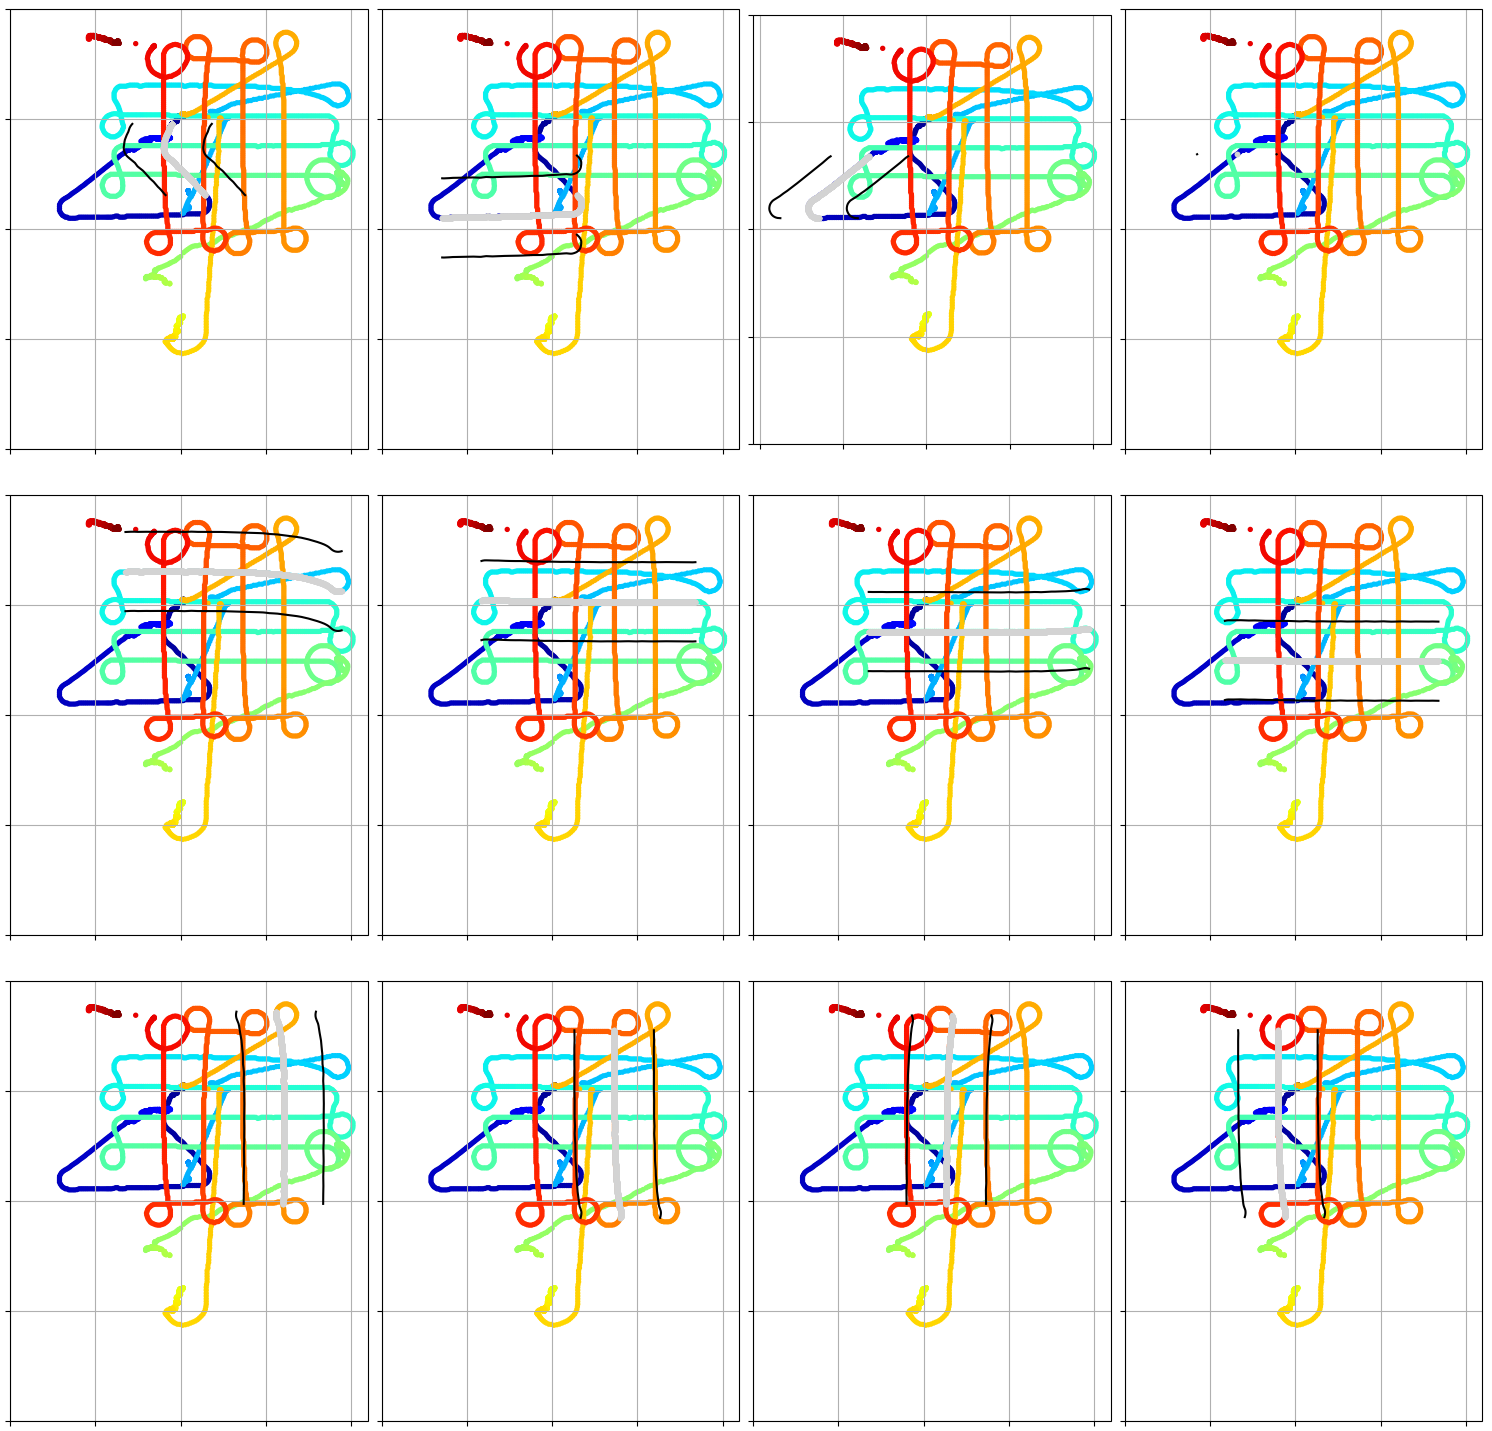

In [40]:
# https://stackoverflow.com/questions/7222382/get-lat-long-given-current-point-distance-and-bearing
from math import asin, atan2, cos, degrees, radians, sin

def get_point_at_distance(lat1, lon1, d, bearing, R=6371):
    """
    lat: initial latitude, in degrees
    lon: initial longitude, in degrees
    d: target distance from initial
    bearing: (true) heading in degrees
    R: optional radius of sphere, defaults to mean radius of earth

    Returns new lat/lon coordinate {d}km from initial, in degrees
    """
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    a = radians(bearing)
    lat2 = asin(sin(lat1) * cos(d/R) + cos(lat1) * sin(d/R) * cos(a))
    lon2 = lon1 + atan2(
        sin(a) * sin(d/R) * cos(lat1),
        cos(d/R) - sin(lat1) * sin(lat2)
    )
    return (degrees(lat2), degrees(lon2),)

# https://stackoverflow.com/questions/69465435/cartopy-show-tick-marks-of-axes
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()


# Now we plot...
fig, axs = plt.subplots(nrows=3,ncols=4,subplot_kw={'projection': ccrs.Mercator()},figsize=(15,15)); axs=axs.flatten()

for i in range(12):
    axs[i].scatter(missions['INX Longitude'].where(conditional_index),missions['INX Latitude'].where(conditional_index),8,missions.index.where(conditional_index), cmap = 'jet', transform=ccrs.PlateCarree())
    (fh, p)  = pyxtf.xtf_read(scan_file_paths[i])
    lon = []
    lat = []
    lon2 = []
    lat2 = []
    lon3 = []
    lat3 = []    
    if i in (0,2,3,8,9,10,11):
        bearing = [90, -90]
    else:
        bearing = [0, -180]
        
    for j in range(len(p[pyxtf.XTFHeaderType.sonar])):
        x, y = [p[pyxtf.XTFHeaderType.sonar][j].SensorXcoordinate, p[pyxtf.XTFHeaderType.sonar][j].SensorYcoordinate]
        lon.append(x)
        lat.append(y)
        yy, xx   = get_point_at_distance(y, x, 0.040, bearing[0])
        lon2.append(xx)
        lat2.append(yy)
        yy, xx   = get_point_at_distance(y, x, 0.040, bearing[1])
        lon3.append(xx)
        lat3.append(yy)

    axs[i].plot(lon,lat,'.',color='lightgray', transform=ccrs.PlateCarree())
    axs[i].plot(lon2,lat2,'',color='k', transform=ccrs.PlateCarree())
    axs[i].plot(lon3,lat3,'',color='k', transform=ccrs.PlateCarree())
    axs[i].set_xticks([-74.220, -74.219, -74.218, -74.217, -74.216], crs=ccrs.PlateCarree())
    axs[i].set_yticks([39.449, 39.450, 39.451, 39.452, 39.453], crs=ccrs.PlateCarree())
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].yaxis.set_major_formatter(lat_formatter)
    axs[i].grid()
    axs[i].tick_params(labelrotation=30);
    axs[i].set_xticklabels('')
    axs[i].set_yticklabels('')

plt.tight_layout(pad=1, h_pad=1, w_pad=1)    


### Now let's turn those ranges into a mesh, then plot these on the map

16.36599564552307
51.70952010154724
20.35687804222107
0.008063554763793945
106.77589678764343
85.85636758804321
110.52572751045227
77.56450414657593
78.8713812828064
78.0409722328186
83.45056986808777
69.59703326225281


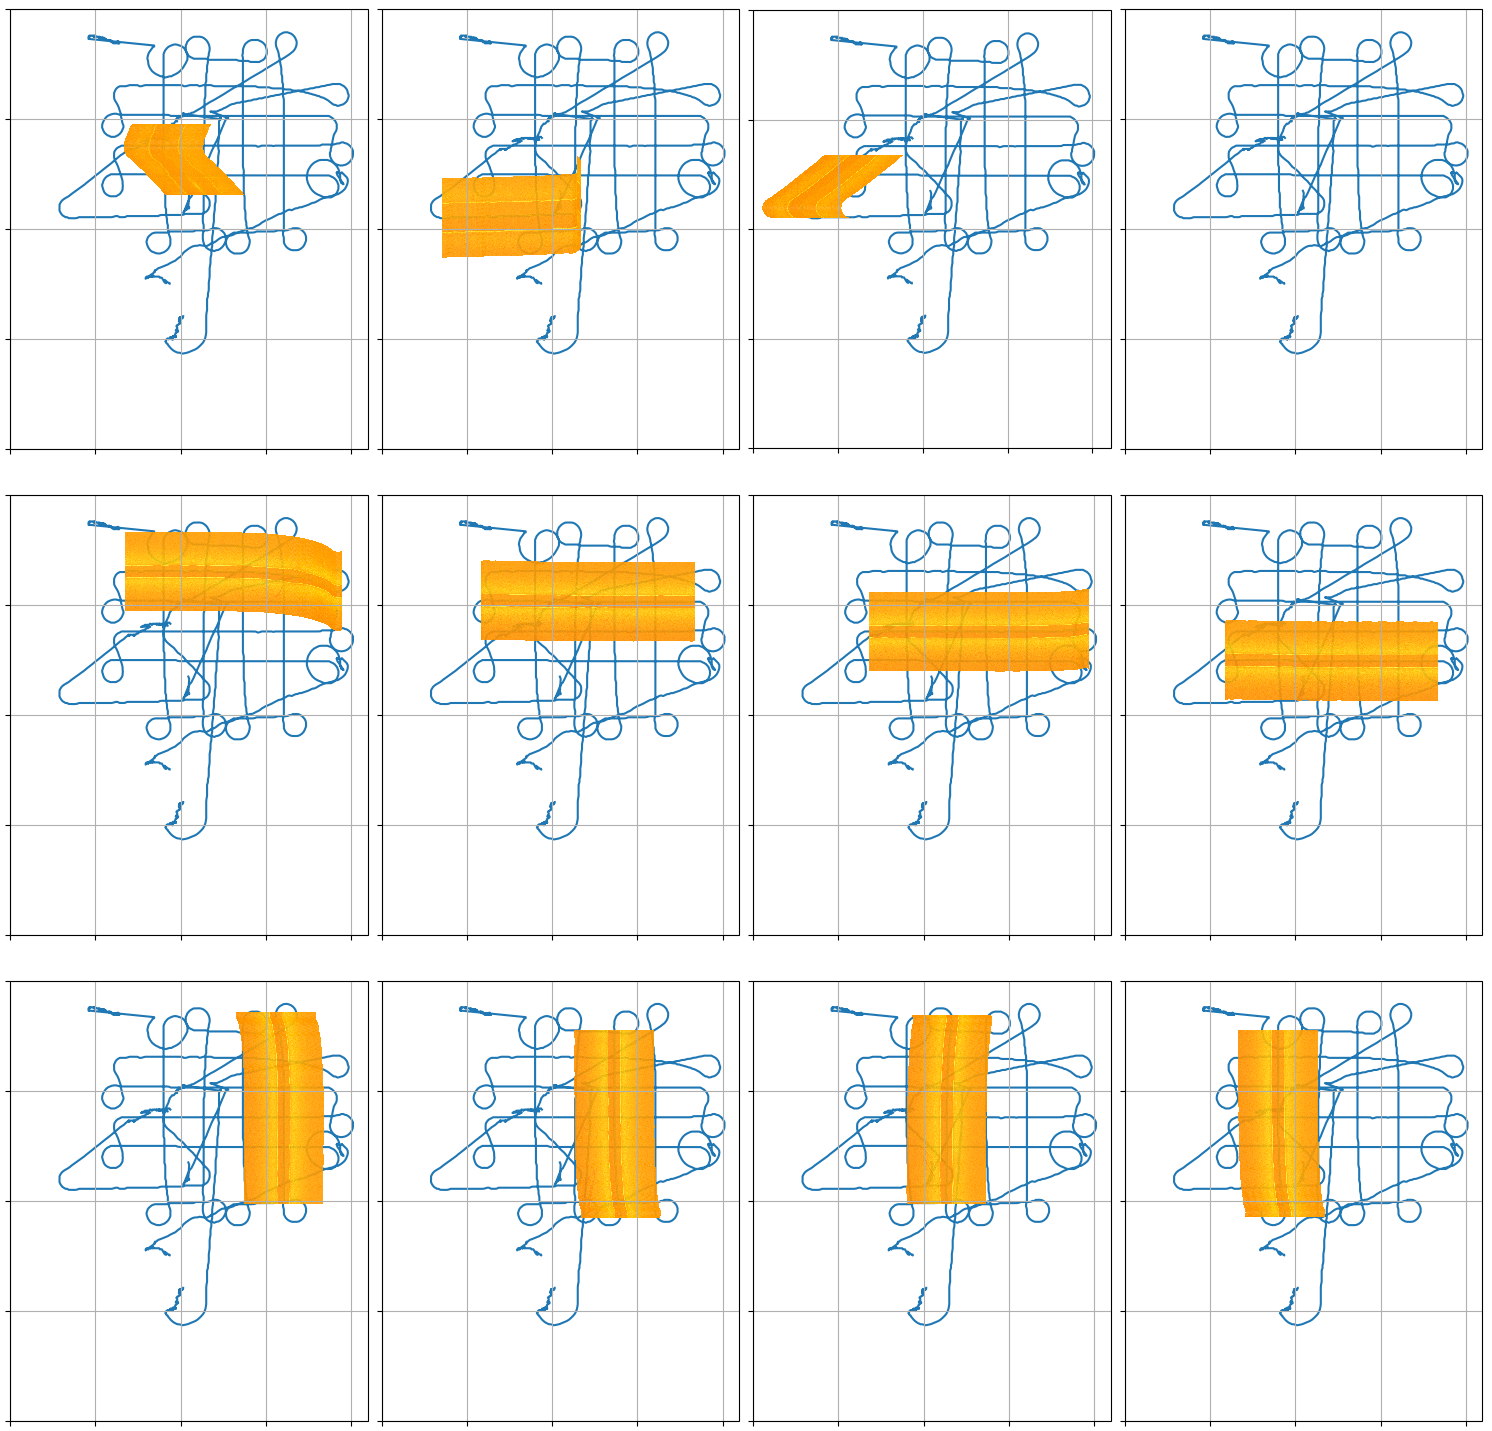

In [41]:
# https://stackoverflow.com/questions/7222382/get-lat-long-given-current-point-distance-and-bearing
from math import asin, atan2, cos, degrees, radians, sin

def get_point_at_distance(lat1, lon1, d, bearing, R=6371):
    """
    lat: initial latitude, in degrees
    lon: initial longitude, in degrees
    d: target distance from initial
    bearing: (true) heading in degrees
    R: optional radius of sphere, defaults to mean radius of earth

    Returns new lat/lon coordinate {d}km from initial, in degrees
    """
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    a = radians(bearing)
    lat2 = asin(sin(lat1) * cos(d/R) + cos(lat1) * sin(d/R) * cos(a))
    lon2 = lon1 + atan2(
        sin(a) * sin(d/R) * cos(lat1),
        cos(d/R) - sin(lat1) * sin(lat2)
    )
    return (degrees(lat2), degrees(lon2),)

# https://stackoverflow.com/questions/69465435/cartopy-show-tick-marks-of-axes
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()


# Now we plot...
fig, axs = plt.subplots(nrows=3,ncols=4,subplot_kw={'projection': ccrs.Mercator()},figsize=(15,15)); axs=axs.flatten()

for i in range(12):
    axs[i].plot(missions['INX Longitude'].where(conditional_index),missions['INX Latitude'].where(conditional_index),transform=ccrs.PlateCarree(),zorder=0)
    (fh, p)  = pyxtf.xtf_read(scan_file_paths[i])
    np_chan1 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=0)
    np_chan2 = pyxtf.concatenate_channel(p[pyxtf.XTFHeaderType.sonar], file_header=fh, channel=1)
    np_chans = (np.hstack((np_chan1,np_chan2)))
    lon = []
    lat = []
    lon2 = [[] for j in range(1000)]
    lat2 = [[] for j in range(1000)]
    lon3 = [[] for j in range(1000)]
    lat3 = [[] for j in range(1000)]
    if i in (0,2,3,8,9,10,11):
        bearing = [90, -90]
    else:
        bearing = [0, -180]
    start = time.time()    
    for j in range(len(p[pyxtf.XTFHeaderType.sonar])):
        x, y = [p[pyxtf.XTFHeaderType.sonar][j].SensorXcoordinate, p[pyxtf.XTFHeaderType.sonar][j].SensorYcoordinate]
        lon.append(x)
        lat.append(y)
        yy, xx   = get_point_at_distance(y, x, 0.040, bearing[0])
        xx = np.linspace(x,xx,1000)
        yy = np.linspace(y,yy,1000)
        lon2 = np.column_stack([lon2, xx])
        lat2 = np.column_stack([lat2, yy])
        yy, xx   = get_point_at_distance(y, x, 0.040, bearing[1])
        xx = np.linspace(x,xx,1000)
        yy = np.linspace(y,yy,1000)        
        lon3 = np.column_stack([lon3, xx])
        lat3 = np.column_stack([lat3, yy])

    if i in (0,2,3,8,9,10,11):
        lons = np.vstack([np.flipud(lon2),lon3])
        lats = np.vstack([lat2,lat3])
    else:
        lons = np.vstack([lon2,lon3])
        lats = np.vstack([np.flipud(lat2),lat3])
        
        
    end = time.time(); print(end - start)    
    
    axs[i].pcolormesh(lons,lats,np_chans.T,cmap='Wistia_r', alpha = .9, transform=ccrs.PlateCarree())
    axs[i].set_xticks([-74.220, -74.219, -74.218, -74.217, -74.216], crs=ccrs.PlateCarree())
    axs[i].set_yticks([39.449, 39.450, 39.451, 39.452, 39.453], crs=ccrs.PlateCarree())
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].yaxis.set_major_formatter(lat_formatter)
    axs[i].grid()
    axs[i].tick_params(labelrotation=30);
    axs[i].set_xticklabels('')
    axs[i].set_yticklabels('')

plt.tight_layout(pad=1, h_pad=1, w_pad=1)    


# We still need to remove the nadir gap! How best to do so?